In [1]:
#import Libraries

import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy as sci
import scipy.stats as stats
from seaborn_qqplot import pplot
import sidetable

sns.set_style('whitegrid')
plt.style.use('bmh')
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlinrBackend.figure_format ='retina'


In [14]:
page=requests.get("""https://www.practo.com/hyderabad/gynecologist-obstetrician""")

In [15]:
page

<Response [200]>

In [16]:
BeautifulSoup(page.text)

<!DOCTYPE html>
<html><head><title>Best Gynecologist Obstetricians In Hyderabad - Instant Appointment Booking, View Fees, Feedbacks | Practo</title><meta content="Best Gynecologist obstetricians in Hyderabad. Book Doctor's Appointment Online, View Fees, User feedbacks, Address &amp; Phone Numbers of Gynecologist/Obstetricians in Hyderabad | Practo" name="description"/><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><script nonce="sOjyvedo8A9mhl5jRvuVFtsJBZtDLUoM" type="text/javascript">(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                      new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
                      j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
                      'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
                      })(window,document,'script','dataLayer',"GTM-PSMVGL5");</script><script nonce="sOjyvedo8A9mhl5jRvuVFtsJBZt

In [17]:
soup = BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html><head><title>Best Gynecologist Obstetricians In Hyderabad - Instant Appointment Booking, View Fees, Feedbacks | Practo</title><meta content="Best Gynecologist obstetricians in Hyderabad. Book Doctor's Appointment Online, View Fees, User feedbacks, Address &amp; Phone Numbers of Gynecologist/Obstetricians in Hyderabad | Practo" name="description"/><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><script nonce="sOjyvedo8A9mhl5jRvuVFtsJBZtDLUoM" type="text/javascript">(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                      new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
                      j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
                      'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
                      })(window,document,'script','dataLayer',"GTM-PSMVGL5");</script><script nonce="sOjyvedo8A9mhl5jRvuVFtsJBZt

In [18]:
soup.find_all("h2",class_="doctor-name")

[<h2 class="doctor-name" data-qa-id="doctor_name">Dr. Shalni .S</h2>,
 <h2 class="doctor-name" data-qa-id="doctor_name">Dr. Puja Lavania</h2>,
 <h2 class="doctor-name" data-qa-id="doctor_name">Dr. M.Kalpana</h2>,
 <h2 class="doctor-name" data-qa-id="doctor_name">Dr. Roya Rozati</h2>,
 <h2 class="doctor-name" data-qa-id="doctor_name">Dr. T. Anuradha</h2>,
 <h2 class="doctor-name" data-qa-id="doctor_name">Dr. G Jayanthi</h2>,
 <h2 class="doctor-name" data-qa-id="doctor_name">Dr. A. Sreegowri</h2>,
 <h2 class="doctor-name" data-qa-id="doctor_name">Dr. BKN Sudha</h2>,
 <h2 class="doctor-name" data-qa-id="doctor_name">Dr. Neeraja Valli G</h2>,
 <h2 class="doctor-name" data-qa-id="doctor_name">Dr. Sradhanjali Maharana</h2>]

In [19]:
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)

['Dr. Shalni .S', 'Dr. Puja Lavania', 'Dr. M.Kalpana', 'Dr. Roya Rozati', 'Dr. T. Anuradha', 'Dr. G Jayanthi', 'Dr. A. Sreegowri', 'Dr. BKN Sudha', 'Dr. Neeraja Valli G', 'Dr. Sradhanjali Maharana']


In [20]:
soup.find_all("span",class_="u-t-capitalize")

[<span class="u-t-capitalize" data-qa-id="practice_city">Hyderabad</span>,
 <span class="u-t-capitalize" data-qa-id="practice_city">Hyderabad</span>,
 <span class="u-t-capitalize" data-qa-id="practice_city">Hyderabad</span>,
 <span class="u-t-capitalize" data-qa-id="practice_city">Hyderabad</span>,
 <span class="u-t-capitalize" data-qa-id="practice_city">Hyderabad</span>,
 <span class="u-t-capitalize" data-qa-id="practice_city">Hyderabad</span>,
 <span class="u-t-capitalize" data-qa-id="practice_city">Hyderabad</span>,
 <span class="u-t-capitalize" data-qa-id="practice_city">Hyderabad</span>,
 <span class="u-t-capitalize" data-qa-id="practice_city">Hyderabad</span>,
 <span class="u-t-capitalize" data-qa-id="practice_city">Hyderabad</span>]

In [21]:
City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)

['Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad']


In [22]:
soup.find_all("span",attrs={"data-qa-id":"practice_locality"})

[<span data-qa-id="practice_locality">Madhapur<!-- -->,</span>,
 <span data-qa-id="practice_locality">Chanda Nagar<!-- -->,</span>,
 <span data-qa-id="practice_locality">Secunderabad<!-- -->,</span>,
 <span data-qa-id="practice_locality">Banjara Hills<!-- -->,</span>,
 <span data-qa-id="practice_locality">KPHB<!-- -->,</span>,
 <span data-qa-id="practice_locality">Vanasthalipuram<!-- -->,</span>,
 <span data-qa-id="practice_locality">KPHB<!-- -->,</span>,
 <span data-qa-id="practice_locality">KPHB<!-- -->,</span>,
 <span data-qa-id="practice_locality">KPHB<!-- -->,</span>,
 <span data-qa-id="practice_locality">Chandra Nagar<!-- -->,</span>]

In [23]:
Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)


['Madhapur,', 'Chanda Nagar,', 'Secunderabad,', 'Banjara Hills,', 'KPHB,', 'Vanasthalipuram,', 'KPHB,', 'KPHB,', 'KPHB,', 'Chandra Nagar,']


In [24]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
print(Hospital_name)

['Hegde Hospital', '\xa0+ 1 more', 'Life Care Gynaecology Hospital', 'Kasturi Multispeciality Hospital', 'MHRT Hospital & Research Center', 'Anu Gynaec Test Tube and Fertility Centre', 'J.S. Hospitals - Ortho, Maternity and General', 'Sree Gowri Surgical Maternity Hospital & Fertility Center', 'Sudha Hospital', 'Akshara Poly Clinic', 'Sradha Women Care']


In [37]:
Hospital_name.remove('\xa0+ 1 more')
print(Hospital_name)

['Hegde Hospital', 'Life Care Gynaecology Hospital', 'Kasturi Multispeciality Hospital', 'MHRT Hospital & Research Center', 'Anu Gynaec Test Tube and Fertility Centre', 'J.S. Hospitals - Ortho, Maternity and General', 'Sree Gowri Surgical Maternity Hospital & Fertility Center', 'Sudha Hospital', 'Akshara Poly Clinic', 'Sradha Women Care']


In [26]:
q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q

[<span class="" data-qa-id="consultation_fee">₹<!-- -->600</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->400</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->700</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->700</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->350</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->400</span>]

In [27]:
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
consultation_fee

['600', '400', '500', '700', '700', '350', '500', '500', '500', '400']

In [28]:
recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
        
        
print(recommendation)

['96% ', '95% ', '87% ', '86% ', '100% ', '94% ', '93% ', '98% ', '100% ', '97% ']


In [29]:
p = soup.find_all("div",class_="u-grey_3-text")
p

[<div class="u-grey_3-text u-smallest-font">Fed up of endless wait?</div>,
 <div class="u-grey_3-text"><div><span class="u-t-underline u-c-pointer">1 Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top"><span>10 - 14 years experience</span></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>11<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>16<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>16<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class=

In [30]:
Specialist=re.findall(r"(Gynecologist/Obstetrician)<",str(p))
Specialist
Specialist.remove('Gynecologist/Obstetrician')
Specialist

['Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician']

['Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician']

In [31]:

len(Specialist)

10

In [32]:
s = soup.find_all('div',{"data-qa-id":"doctor_experience"})
s

[<div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>11<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>16<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>16<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>36<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>31<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>14<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>19<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>16<!-- --> <sp

In [33]:
experience= re.findall(r"(\d+)<",str(s))
print(experience)
len(experience)

['11', '16', '16', '36', '31', '14', '19', '16', '17', '24']


10

In [34]:
len(recommendation)

10

In [35]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,
   
}

In [38]:
Gynecologist_df1 = pd.DataFrame(dictionary)
Gynecologist_df1

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Shalni .S,Gynecologist/Obstetrician,11,Hyderabad,"Madhapur,",Hegde Hospital,600,96%
1,Dr. Puja Lavania,Gynecologist/Obstetrician,16,Hyderabad,"Chanda Nagar,",Life Care Gynaecology Hospital,400,95%
2,Dr. M.Kalpana,Gynecologist/Obstetrician,16,Hyderabad,"Secunderabad,",Kasturi Multispeciality Hospital,500,87%
3,Dr. Roya Rozati,Gynecologist/Obstetrician,36,Hyderabad,"Banjara Hills,",MHRT Hospital & Research Center,700,86%
4,Dr. T. Anuradha,Gynecologist/Obstetrician,31,Hyderabad,"KPHB,",Anu Gynaec Test Tube and Fertility Centre,700,100%
5,Dr. G Jayanthi,Gynecologist/Obstetrician,14,Hyderabad,"Vanasthalipuram,","J.S. Hospitals - Ortho, Maternity and General",350,94%
6,Dr. A. Sreegowri,Gynecologist/Obstetrician,19,Hyderabad,"KPHB,",Sree Gowri Surgical Maternity Hospital & Ferti...,500,93%
7,Dr. BKN Sudha,Gynecologist/Obstetrician,16,Hyderabad,"KPHB,",Sudha Hospital,500,98%
8,Dr. Neeraja Valli G,Gynecologist/Obstetrician,17,Hyderabad,"KPHB,",Akshara Poly Clinic,500,100%
9,Dr. Sradhanjali Maharana,Gynecologist/Obstetrician,24,Hyderabad,"Chandra Nagar,",Sradha Women Care,400,97%


# Hyderabad Dentist Doc

In [39]:
page=requests.get("""https://www.practo.com/hyderabad/dentist""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)


q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
consultation_fee

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
print(recommendation)


s = soup.find_all('div',{"data-qa-id":"doctor_experience"})
s
experience=re.findall(r"(\d+)<",str(s))
print(experience)


['Dr. Ravindra Ratolikar', 'Dr. Venkatesh', 'Dr. Sudha Chitumalla', 'Dr. M Sridhar', 'Dr. M. S. Sushma Susik', 'Dr. Yugandhar', 'Dr. K Sravani Reddy', 'Dr. M.Manjula', 'Dr. Deepesh Singh', 'Dr. Seetharam Kumar D']
['Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad']
['Narayanguda,', 'Srinagar Colony,', 'Banjara Hills,', 'Kondapur,', 'Mehdipatnam,', 'KPHB,', 'Karkhana,', 'Padmarao Nagar,', 'Kondapur,', 'Nizampet,']


[<span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->400</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>]

['500', '500', '400', '300', '300', '300', '300', '500', '500', '500']

['98% ', '97% ', '100% ', '99% ', '98% ', '96% ', '98% ', '97% ', '99% ', '99% ']


[<div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>39<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>17<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>23<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>22<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>31<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>20<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>11<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>30<!-- --> <sp

['39', '17', '23', '22', '31', '20', '11', '30', '19', '26']


In [41]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
#Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 3 more')
#Hospital_name.remove('\xa0+ 1 more')
#Hospital_name.remove('\xa0+ 2 more')
#Hospital_name.remove('\xa0+ 1 more')
#Hospital_name.remove('\xa0+ 1 more')
#Hospital_name.remove('\xa0+ 1 more')
print(Hospital_name)
len(Hospital_name)

["Dr. Ravindra Ratolikar's Dental Clinic", 'VDentis Dental Care', 'Tooth Needs Speciality Dental Care', 'Dental 360', 'Brite Smiles Dental Clinic', 'National Dental Care', 'SmilenGlow Dental and Skin Hospital', 'Teethmate Speciality Dental Clinic', 'Giggles Dental Care', 'Cosmedent Speciality Dental Clinic']


10

In [42]:
p = soup.find_all("div",class_="u-grey_3-text")
p

[<div class="u-grey_3-text u-smallest-font">Fed up of endless wait?</div>,
 <div class="u-grey_3-text"><div><span class="u-t-underline u-c-pointer">1 Dentist</span></div><div class="uv2-spacer--xs-top"><span>20 years experience</span></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Dentist</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>39<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Dentist</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>17<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Dentist</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>23<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Dentist</span></div><div class="uv2-spacer--xs-top" data-qa-

In [43]:
Specialist=re.findall(r"(Dentist)<",str(p))
Specialist
Specialist.remove('Dentist')
Specialist
len(Specialist)

['Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist']

['Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist']

10

In [44]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,
   
}

In [45]:
len(experience)

10

In [46]:
Dentist_df1 = pd.DataFrame(dictionary)
Dentist_df1

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Ravindra Ratolikar,Dentist,39,Hyderabad,"Narayanguda,",Dr. Ravindra Ratolikar's Dental Clinic,500,98%
1,Dr. Venkatesh,Dentist,17,Hyderabad,"Srinagar Colony,",VDentis Dental Care,500,97%
2,Dr. Sudha Chitumalla,Dentist,23,Hyderabad,"Banjara Hills,",Tooth Needs Speciality Dental Care,400,100%
3,Dr. M Sridhar,Dentist,22,Hyderabad,"Kondapur,",Dental 360,300,99%
4,Dr. M. S. Sushma Susik,Dentist,31,Hyderabad,"Mehdipatnam,",Brite Smiles Dental Clinic,300,98%
5,Dr. Yugandhar,Dentist,20,Hyderabad,"KPHB,",National Dental Care,300,96%
6,Dr. K Sravani Reddy,Dentist,11,Hyderabad,"Karkhana,",SmilenGlow Dental and Skin Hospital,300,98%
7,Dr. M.Manjula,Dentist,30,Hyderabad,"Padmarao Nagar,",Teethmate Speciality Dental Clinic,500,97%
8,Dr. Deepesh Singh,Dentist,19,Hyderabad,"Kondapur,",Giggles Dental Care,500,99%
9,Dr. Seetharam Kumar D,Dentist,26,Hyderabad,"Nizampet,",Cosmedent Speciality Dental Clinic,500,99%


# General Physian

In [47]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22General%20Physician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Hyderabad""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)


q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
consultation_fee

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
print(recommendation)


s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
s
experience=re.findall(r"(\d{2})",str(s))
print(experience)

['Dr. Murali Yelchuri', 'Dr. S. Ravindra Kumar', 'Dr. Venkatesh Billakanti', 'Dr. N.Netaji', 'Dr. Shaeq Mirza', 'Dr. Anil Kotamreddy', 'Dr. Srinivas Jakkinaboina', 'Dr. Aashritha Mekala', 'Dr. Fini Ani Philip', 'Dr. Vasantha Jella']
['Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad']
['Miyapur,', 'Ameerpet,', 'Manikonda,', 'Vanasthalipuram,', 'Hyderguda,', 'Kondapur,', 'Narsingi,', 'Attapur,', 'KPHB,', 'Nagole,']


[<span class="" data-qa-id="consultation_fee">₹<!-- -->600</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->600</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->900</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>]

['600', '500', '500', '500', '600', '900', '500', '300', '500', '300']

['89% ', '75% ', '88% ', '100% ', '98% ', '100% ', '75% ', '100% ', '100% ', '80% ']


[<div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>16<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>30<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>14<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>23<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>16<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>18<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>24<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>10<!-- --> <sp

['16', '30', '14', '23', '16', '18', '24', '10', '28', '16']


In [48]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
#Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 2 more')
print(Hospital_name)
len(Hospital_name)

['Srikara Hospitals', 'Aster Prime Hospital', 'Relief Clinic', 'Sugar Care Clinic', 'Apollo Hospital', 'Idea Clinics', 'MedSurge Clinics', 'Zoi Hospitals', "Dr. Finy's Clinic", 'Metro City Hospital']


10

In [49]:
p = soup.find_all("div",class_="u-grey_3-text")
p

[<div class="u-grey_3-text u-smallest-font">Fed up of endless wait?</div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>General Physician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>16<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>General Physician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>30<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>General Physician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>14<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>General Physician</span></div><div class="uv2-spacer--xs-top u-d-flex"><p>Special Interest in <!-- -->Diabetology</p><div><i class="icon-ic_info u-c-pointer" data-for="listing-special-interest" data-tip=

In [50]:
Specialist=re.findall(r"(General Physician)<",str(p))
Specialist
len(Specialist)

['General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician']

10

In [51]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,
   
}

In [52]:
len(recommendation)

10

In [53]:
General_Physician_df1=pd.DataFrame(dictionary)
General_Physician_df1

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Murali Yelchuri,General Physician,16,Hyderabad,"Miyapur,",Srikara Hospitals,600,89%
1,Dr. S. Ravindra Kumar,General Physician,30,Hyderabad,"Ameerpet,",Aster Prime Hospital,500,75%
2,Dr. Venkatesh Billakanti,General Physician,14,Hyderabad,"Manikonda,",Relief Clinic,500,88%
3,Dr. N.Netaji,General Physician,23,Hyderabad,"Vanasthalipuram,",Sugar Care Clinic,500,100%
4,Dr. Shaeq Mirza,General Physician,16,Hyderabad,"Hyderguda,",Apollo Hospital,600,98%
5,Dr. Anil Kotamreddy,General Physician,18,Hyderabad,"Kondapur,",Idea Clinics,900,100%
6,Dr. Srinivas Jakkinaboina,General Physician,24,Hyderabad,"Narsingi,",MedSurge Clinics,500,75%
7,Dr. Aashritha Mekala,General Physician,10,Hyderabad,"Attapur,",Zoi Hospitals,300,100%
8,Dr. Fini Ani Philip,General Physician,28,Hyderabad,"KPHB,",Dr. Finy's Clinic,500,100%
9,Dr. Vasantha Jella,General Physician,16,Hyderabad,"Nagole,",Metro City Hospital,300,80%


# Dermotologist

In [54]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Dermatologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Hyderabad""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)


q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
consultation_fee

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
print(recommendation)






['Dr. V.Shirisha', 'Dr. Soumya Podduturi', 'Dr. Nagaraju D', 'Dr. Radha Penumatsa', 'Dr. Deepthi Atmakuri', 'Dr. Y Nikhil Kumar Reddy', 'Dr. Raghu Ram Reddy.D', 'Dr. D Subhash Reddy', 'Dr. Radha Shah', 'Dr. Veman Enthangi']
['Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad']
['Kondapur,', 'Kompally,', 'Kukatpally,', 'Kompally,', 'Banjara Hills,', 'Suchitra Circle,', 'Vanasthalipuram,', 'Habsiguda,', 'Jubilee Hills,', 'Kondapur,']


[<span class="" data-qa-id="consultation_fee">₹<!-- -->650</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->600</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->700</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->600</span>]

['650', '600', '500', '500', '700', '500', '500', '500', '1000', '600']

['93% ', '96% ', '96% ', '100% ', '100% ', '93% ', '97% ', '58% ', '86% ', '96% ']


In [55]:
s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
s


[<div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>16<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>12<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>10<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>9<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>8<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>11<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>12<!-- --> <span>years experience overall</span></div></div>,
 <div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>23<!-- --> <span

In [56]:
experience = re.findall(r"(\d+)<",str(s))
print(experience)
len(experience)


['16', '12', '10', '9', '8', '11', '12', '23', '27', '17']


10

In [61]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
print(Hospital_name)
len(Hospital_name)

['Shirisha Skin & Hair Clinic', "Dr. Soumya's Aria Skin & Hair Clinic", 'Shweta Dental Skin and Hair Transplant Centre', 'Veda Skin & Hair Clinic', 'Clinica Derm & Clinica Pain', 'IRA Clinic', 'Radiance Skin Hair Cosmetic  Center', 'Balaji Skin and Hair Clinic', 'Apollo Hospitals', 'Ellora Skin & Cosmetology Clinic']


10

In [62]:
p = soup.find_all("div",class_="u-grey_3-text")
p

[<div class="u-grey_3-text u-smallest-font">Fed up of endless wait?</div>,
 <div class="u-grey_3-text"><div><span class="u-t-underline u-c-pointer">1 Dermatologist</span></div><div class="uv2-spacer--xs-top"><span>12 years experience</span></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Dermatologist</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>16<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Dermatologist</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>12<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Dermatologist</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>10<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Dermatologist</span></div><div class

In [63]:
Specialist=re.findall(r"(Dermatologist)<",str(p))
Specialist.remove('Dermatologist')
print(Specialist)
len(Specialist)

['Dermatologist', 'Dermatologist', 'Dermatologist', 'Dermatologist', 'Dermatologist', 'Dermatologist', 'Dermatologist', 'Dermatologist', 'Dermatologist', 'Dermatologist']


10

In [64]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,
   
}

In [65]:
Dermatologist_df1=pd.DataFrame(dictionary)
Dermatologist_df1

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. V.Shirisha,Dermatologist,16,Hyderabad,"Kondapur,",Shirisha Skin & Hair Clinic,650,93%
1,Dr. Soumya Podduturi,Dermatologist,12,Hyderabad,"Kompally,",Dr. Soumya's Aria Skin & Hair Clinic,600,96%
2,Dr. Nagaraju D,Dermatologist,10,Hyderabad,"Kukatpally,",Shweta Dental Skin and Hair Transplant Centre,500,96%
3,Dr. Radha Penumatsa,Dermatologist,9,Hyderabad,"Kompally,",Veda Skin & Hair Clinic,500,100%
4,Dr. Deepthi Atmakuri,Dermatologist,8,Hyderabad,"Banjara Hills,",Clinica Derm & Clinica Pain,700,100%
5,Dr. Y Nikhil Kumar Reddy,Dermatologist,11,Hyderabad,"Suchitra Circle,",IRA Clinic,500,93%
6,Dr. Raghu Ram Reddy.D,Dermatologist,12,Hyderabad,"Vanasthalipuram,",Radiance Skin Hair Cosmetic Center,500,97%
7,Dr. D Subhash Reddy,Dermatologist,23,Hyderabad,"Habsiguda,",Balaji Skin and Hair Clinic,500,58%
8,Dr. Radha Shah,Dermatologist,27,Hyderabad,"Jubilee Hills,",Apollo Hospitals,1000,86%
9,Dr. Veman Enthangi,Dermatologist,17,Hyderabad,"Kondapur,",Ellora Skin & Cosmetology Clinic,600,96%


# Ear-nose-throat

In [66]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Ear-nose-throat%20(ent)%20Specialist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Hyderabad""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)


q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
consultation_fee

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        if i.text:
            recommendation.append(i.text)
        else:
            recommendation.append(np.nan)    
print(recommendation)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)

['Dr. Sampurna Ghosh', 'Dr. M M Shareef', 'Dr. Mahesh.D', 'Dr. Ranbeer Singh', 'Dr. Sushmitha', 'Dr. Kranthi Paladugu', 'Dr. Md. Naseeruddin', 'Dr. Shakuntala Ghosh', 'Dr. Sathish Kumar S', 'Dr. D.Vidyasagar']
['Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad']
['Hitech City,', 'Madhapur,', 'Attapur,', 'Himayat Nagar,', 'Ameerpet,', 'Kukatpally,', 'Tolichowki,', 'Chaitanyapuri,', 'Miyapur,', 'Secunderabad,']


[<span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->600</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->400</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->900</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->600</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->400</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->400</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->700</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>]

['500', '600', '400', '900', '600', '400', '400', '700', '500', '800']

['98% ', '96% ', '95% ', '95% ', '95% ', '85% ', '99% ', '95% ', '92% ', '99% ']
['12', '24', '8', '37', '27', '17', '8', '22', '16', '21']


In [67]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 3 more')
Hospital_name.remove('\xa0+ 1 more')
#Hospital_name.remove('\xa0+ 1 more')
print(Hospital_name)
len(Hospital_name)

['Medicover Hospitals', "Dr Shareef's ENT Clinic", 'Kakatiya ENT Clinic', 'SMS ENT And Surgical Clinic', 'Aster Prime Hospital', 'Kranthi ENT & Allergy Clinic', 'ENT Family Care Clinic', 'Sri Rama ENT Care Center', 'Korum ENT Superspeciality Centre', 'Apollo Hospital']


10

In [68]:
p = soup.find_all("div",class_="u-grey_3-text")
p

[<div class="u-grey_3-text u-smallest-font">Fed up of endless wait?</div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Ear-Nose-Throat (ENT) Specialist</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>12<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Ear-Nose-Throat (ENT) Specialist</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>24<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Ear-Nose-Throat (ENT) Specialist</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>8<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Ear-Nose-Throat (ENT) Specialist</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>37<!-- --> <span>years experience overall</spa

In [69]:
Specialist=re.findall(r"(Ear-Nose-Throat)",str(p))
print(Specialist)

len(Specialist)

['Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat']


10

In [70]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,
   
}

In [71]:
ENT_df1 = pd.DataFrame(dictionary)
ENT_df1

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Sampurna Ghosh,Ear-Nose-Throat,12,Hyderabad,"Hitech City,",Medicover Hospitals,500,98%
1,Dr. M M Shareef,Ear-Nose-Throat,24,Hyderabad,"Madhapur,",Dr Shareef's ENT Clinic,600,96%
2,Dr. Mahesh.D,Ear-Nose-Throat,8,Hyderabad,"Attapur,",Kakatiya ENT Clinic,400,95%
3,Dr. Ranbeer Singh,Ear-Nose-Throat,37,Hyderabad,"Himayat Nagar,",SMS ENT And Surgical Clinic,900,95%
4,Dr. Sushmitha,Ear-Nose-Throat,27,Hyderabad,"Ameerpet,",Aster Prime Hospital,600,95%
5,Dr. Kranthi Paladugu,Ear-Nose-Throat,17,Hyderabad,"Kukatpally,",Kranthi ENT & Allergy Clinic,400,85%
6,Dr. Md. Naseeruddin,Ear-Nose-Throat,8,Hyderabad,"Tolichowki,",ENT Family Care Clinic,400,99%
7,Dr. Shakuntala Ghosh,Ear-Nose-Throat,22,Hyderabad,"Chaitanyapuri,",Sri Rama ENT Care Center,700,95%
8,Dr. Sathish Kumar S,Ear-Nose-Throat,16,Hyderabad,"Miyapur,",Korum ENT Superspeciality Centre,500,92%
9,Dr. D.Vidyasagar,Ear-Nose-Throat,21,Hyderabad,"Secunderabad,",Apollo Hospital,800,99%


# Homoeopathy

In [82]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Homoeopath%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Hyderabad""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Satish Erra', 'Dr. Ravinder Raju', 'Dr. B.Suresh Buddha', 'Dr. Panchagnula Satyanarayana Murthy', 'Dr. G.B.Chalam', 'Dr. Sandhya', 'Dr. Vijendra Reddy', 'Dr. Dubashi Ramesh', 'Dr. Chetan Raj', 'Dr. Chaitanya']
10
----------------------------------------------------------------------------------------------------
['Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad']
10
----------------------------------------------------------------------------------------------------
['Dilsukhnagar,', 'Kukatpally,', 'Kukatpally,', 'Kachiguda,', 'Chanda Nagar,', 'Manikonda,', 'Kukatpally,', 'Trimulgherry,', 'Begumpet,', 'Kachiguda,']
10
----------------------------------------------------------------------------------------------------


[<span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->51</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>]

['500', '300', '300', '300', '300', '500', '300', '300', '51', '300']
10
----------------------------------------------------------------------------------------------------
['98% ', '71% ', 'nan', '86% ', '100% ', '99% ', '97% ', '75% ', '97% ', '98% ']
10
----------------------------------------------------------------------------------------------------
['13', '24', '16', '29', '14', '19', '19', '41', '11', '14']
10
----------------------------------------------------------------------------------------------------


In [84]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
#Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
#Hospital_name.remove('\xa0+ 3 more')
Hospital_name.remove('\xa0+ 4 more')
print(Hospital_name)
len(Hospital_name)

["Dr. Satish Erra's Homeopathy Clinic", 'Positive Homeopathy', 'Positive Homeopathy', 'Positive Homeopathy', 'HEAAL Homeopathy Clinic', 'Unique Homeopathy and Diet Clinic', 'Positive Homeopathy', 'Dr.Dubashi Ramesh Homeopathy', "Dr. Chetan's Homeo Clinics", 'Positive Homeopathy']


10

In [85]:
p = soup.find_all("div",class_="u-grey_3-text")
p

[<div class="u-grey_3-text u-smallest-font">Fed up of endless wait?</div>,
 <div class="u-grey_3-text"><div><span class="u-t-underline u-c-pointer">1 Homoeopath</span></div><div class="uv2-spacer--xs-top"><span>50 years experience</span></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><div><img src="//www.practostatic.com/web-assets/images/ayush.a29393356509.svg"/> </div><span>Homoeopath</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>13<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><div><img src="//www.practostatic.com/web-assets/images/ayush.a29393356509.svg"/> </div><span>Homoeopath</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>24<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><div><img src="//www.practostatic.com/web-assets/images/ayush.a29393356509.svg"/> </div><span

In [86]:
Specialist = re.findall(r"(Homoeopath)<",str(p))
Specialist
Specialist.remove('Homoeopath')
len(Specialist)

['Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath']

10

In [87]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,
   
}

In [88]:
Homoeopath_df1 = pd.DataFrame(dictionary)
Homoeopath_df1

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Satish Erra,Homoeopath,13,Hyderabad,"Dilsukhnagar,",Dr. Satish Erra's Homeopathy Clinic,500,98%
1,Dr. Ravinder Raju,Homoeopath,24,Hyderabad,"Kukatpally,",Positive Homeopathy,300,71%
2,Dr. B.Suresh Buddha,Homoeopath,16,Hyderabad,"Kukatpally,",Positive Homeopathy,300,nan
3,Dr. Panchagnula Satyanarayana Murthy,Homoeopath,29,Hyderabad,"Kachiguda,",Positive Homeopathy,300,86%
4,Dr. G.B.Chalam,Homoeopath,14,Hyderabad,"Chanda Nagar,",HEAAL Homeopathy Clinic,300,100%
5,Dr. Sandhya,Homoeopath,19,Hyderabad,"Manikonda,",Unique Homeopathy and Diet Clinic,500,99%
6,Dr. Vijendra Reddy,Homoeopath,19,Hyderabad,"Kukatpally,",Positive Homeopathy,300,97%
7,Dr. Dubashi Ramesh,Homoeopath,41,Hyderabad,"Trimulgherry,",Dr.Dubashi Ramesh Homeopathy,300,75%
8,Dr. Chetan Raj,Homoeopath,11,Hyderabad,"Begumpet,",Dr. Chetan's Homeo Clinics,51,97%
9,Dr. Chaitanya,Homoeopath,14,Hyderabad,"Kachiguda,",Positive Homeopathy,300,98%


# Ayurveda

In [89]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Ayurveda%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Hyderabad""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. S Sarangapani', 'Dr. Anupama Uppuluri', 'Dr. Rajya Lakshmi', 'Dr. Priti Thakre', 'Dr. Bindu Menon', 'Dr. Mallikarjun Eleri', 'Dr. M. Narasimha', 'Dr. Alivelu Manga', 'Dr. S Mahesh Kumar', 'Dr. Rashmi BV']
10
----------------------------------------------------------------------------------------------------
['Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad']
10
----------------------------------------------------------------------------------------------------
['Erragadda,', 'Bachupally,', 'Kondapur,', 'KPHB,', 'Jubilee Hills,', 'Lingampally,', 'Ameerpet,', 'Himayat Nagar,', 'KPHB,', 'Erragadda,']
10
----------------------------------------------------------------------------------------------------


[<span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->299</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->400</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>]

['500', '500', '500', '500', '1000', '300', '500', '299', '400', '500']
10
----------------------------------------------------------------------------------------------------
['99% ', '100% ', '100% ', '100% ', '97% ', '100% ', '89% ', '93% ', '100% ', '100% ']
10
----------------------------------------------------------------------------------------------------
['42', '23', '26', '20', '20', '10', '23', '24', '13', '19']
10
----------------------------------------------------------------------------------------------------


In [90]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 1 more')
#Hospital_name.remove('\xa0+ 1 more')
#Hospital_name.remove('\xa0+ 1 more')
#Hospital_name.remove('\xa0+ 1 more')
#Hospital_name.remove('\xa0+ 1 more')

print(Hospital_name)
len(Hospital_name)

['Sai Bharadwaja Advanced Ayurveda Hospital', 'Snigdha Ayurvedic Hospital', 'Ayurkalpa', 'Chaudhari Clinic-Ayurvedic Infertility Treatment Center', 'Apollo Hospitals', 'Ayu Suraksha Ayurveda & Ano Rectal Care Center', 'S.B. Ayurvedic Speciality Clinic', 'JIVA Ayurveda', 'Sri Veda Sushruta Ayurveda Hospital', 'Charaka Ayurveda']


10

In [91]:
p = soup.find_all("div",class_="u-grey_3-text")
p

[<div class="u-grey_3-text u-smallest-font">Fed up of endless wait?</div>,
 <div class="u-grey_3-text"><div><span class="u-t-underline u-c-pointer">2 Ayurveda</span></div><div class="uv2-spacer--xs-top"><span>13 - 17 years experience</span></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><div><img src="//www.practostatic.com/web-assets/images/ayush.a29393356509.svg"/> </div><span>Ayurveda</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>42<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><div><img src="//www.practostatic.com/web-assets/images/ayush.a29393356509.svg"/> </div><span>Ayurveda</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>23<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><div><img src="//www.practostatic.com/web-assets/images/ayush.a29393356509.svg"/> </div><span>

In [92]:
Specialist = re.findall(r"(Ayurveda)<",str(p))
Specialist
Specialist.remove('Ayurveda')
len(Specialist)

['Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda']

10

In [93]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [94]:
Ayurveda_df1 = pd.DataFrame(dictionary)
Ayurveda_df1

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. S Sarangapani,Ayurveda,42,Hyderabad,"Erragadda,",Sai Bharadwaja Advanced Ayurveda Hospital,500,99%
1,Dr. Anupama Uppuluri,Ayurveda,23,Hyderabad,"Bachupally,",Snigdha Ayurvedic Hospital,500,100%
2,Dr. Rajya Lakshmi,Ayurveda,26,Hyderabad,"Kondapur,",Ayurkalpa,500,100%
3,Dr. Priti Thakre,Ayurveda,20,Hyderabad,"KPHB,",Chaudhari Clinic-Ayurvedic Infertility Treatme...,500,100%
4,Dr. Bindu Menon,Ayurveda,20,Hyderabad,"Jubilee Hills,",Apollo Hospitals,1000,97%
5,Dr. Mallikarjun Eleri,Ayurveda,10,Hyderabad,"Lingampally,",Ayu Suraksha Ayurveda & Ano Rectal Care Center,300,100%
6,Dr. M. Narasimha,Ayurveda,23,Hyderabad,"Ameerpet,",S.B. Ayurvedic Speciality Clinic,500,89%
7,Dr. Alivelu Manga,Ayurveda,24,Hyderabad,"Himayat Nagar,",JIVA Ayurveda,299,93%
8,Dr. S Mahesh Kumar,Ayurveda,13,Hyderabad,"KPHB,",Sri Veda Sushruta Ayurveda Hospital,400,100%
9,Dr. Rashmi BV,Ayurveda,19,Hyderabad,"Erragadda,",Charaka Ayurveda,500,100%


In [95]:
Hyd_df = pd.concat([Gynecologist_df1,Dentist_df1,General_Physician_df1,Dermatologist_df1,ENT_df1,Homoeopath_df1,Ayurveda_df1],axis=0)
Hyd_df

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Shalni .S,Gynecologist/Obstetrician,11,Hyderabad,"Madhapur,",Hegde Hospital,600,96%
1,Dr. Puja Lavania,Gynecologist/Obstetrician,16,Hyderabad,"Chanda Nagar,",Life Care Gynaecology Hospital,400,95%
2,Dr. M.Kalpana,Gynecologist/Obstetrician,16,Hyderabad,"Secunderabad,",Kasturi Multispeciality Hospital,500,87%
3,Dr. Roya Rozati,Gynecologist/Obstetrician,36,Hyderabad,"Banjara Hills,",MHRT Hospital & Research Center,700,86%
4,Dr. T. Anuradha,Gynecologist/Obstetrician,31,Hyderabad,"KPHB,",Anu Gynaec Test Tube and Fertility Centre,700,100%
...,...,...,...,...,...,...,...,...
5,Dr. Mallikarjun Eleri,Ayurveda,10,Hyderabad,"Lingampally,",Ayu Suraksha Ayurveda & Ano Rectal Care Center,300,100%
6,Dr. M. Narasimha,Ayurveda,23,Hyderabad,"Ameerpet,",S.B. Ayurvedic Speciality Clinic,500,89%
7,Dr. Alivelu Manga,Ayurveda,24,Hyderabad,"Himayat Nagar,",JIVA Ayurveda,299,93%
8,Dr. S Mahesh Kumar,Ayurveda,13,Hyderabad,"KPHB,",Sri Veda Sushruta Ayurveda Hospital,400,100%


# MUMBAI

In [97]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Gynecologist%2Fobstetrician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Mumbai""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Varsha Degwekar', 'Dr. Anjali Jitendra Bapat', 'Dr. Shubhada Kulkarni', 'Dr. Sita Gururaja', 'Dr. Madhushree Venkat', 'Dr. Nanda R Kumar', 'Dr. Pradnya Randive', 'Dr. Shilpa Abhyankar', 'Dr. Shruti Parikh', 'Dr. Veena G. Shinde']
10
----------------------------------------------------------------------------------------------------
['Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai']
10
----------------------------------------------------------------------------------------------------
['Powai,', 'Mahim,', 'Andheri West,', 'Powai,', 'Mulund West,', 'Chembur East,', 'Bhandup West,', 'Dadar East,', 'Borivali West,', 'Andheri,']
10
----------------------------------------------------------------------------------------------------


[<span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>]

['1000', '1000', '1000', '800', '800', '1000', '800', '800', '800', '800']
10
----------------------------------------------------------------------------------------------------
['94% ', '95% ', '90% ', '98% ', '82% ', '89% ', '95% ', '97% ', '100% ', '94% ']
10
----------------------------------------------------------------------------------------------------
['35', '36', '43', '26', '22', '19', '16', '28', '14', '33']
10
----------------------------------------------------------------------------------------------------


In [103]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 5 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')

print(Hospital_name)
len(Hospital_name)

['Care and Cure Maternity and Nursing Home', 'Dr Anjali Bapat Clinic', 'Kulkarni Hospital', "Dr. Sita's Clinic", 'Practo Care Surgeries', "Dr. Nanda R Kumar's Gynecology Clinic.", 'Aaditya Care Maternity Home', 'Parchure Nursing Home', 'Eye Hospital & IVF (Fertility) Centre', 'Practo Care Surgeries']


10

In [105]:
p = soup.find_all("div",class_="u-grey_3-text")
p
Specialist = re.findall(r"(Gynecologist/Obstetrician)<",str(p))
print(Specialist)
#Specialist.remove('Gynecologist/Obstetrician')
len(Specialist)

[<div class="u-grey_3-text u-smallest-font">Fed up of endless wait?</div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>35<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>36<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>43<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>26<!-- --> <span>years experience overall</span></div></div></div>,
 <div

['Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician']


10

In [106]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [107]:
Gynecologist_df2 = pd.DataFrame(dictionary)
Gynecologist_df2

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Varsha Degwekar,Gynecologist/Obstetrician,35,Mumbai,"Powai,",Care and Cure Maternity and Nursing Home,1000,94%
1,Dr. Anjali Jitendra Bapat,Gynecologist/Obstetrician,36,Mumbai,"Mahim,",Dr Anjali Bapat Clinic,1000,95%
2,Dr. Shubhada Kulkarni,Gynecologist/Obstetrician,43,Mumbai,"Andheri West,",Kulkarni Hospital,1000,90%
3,Dr. Sita Gururaja,Gynecologist/Obstetrician,26,Mumbai,"Powai,",Dr. Sita's Clinic,800,98%
4,Dr. Madhushree Venkat,Gynecologist/Obstetrician,22,Mumbai,"Mulund West,",Practo Care Surgeries,800,82%
5,Dr. Nanda R Kumar,Gynecologist/Obstetrician,19,Mumbai,"Chembur East,",Dr. Nanda R Kumar's Gynecology Clinic.,1000,89%
6,Dr. Pradnya Randive,Gynecologist/Obstetrician,16,Mumbai,"Bhandup West,",Aaditya Care Maternity Home,800,95%
7,Dr. Shilpa Abhyankar,Gynecologist/Obstetrician,28,Mumbai,"Dadar East,",Parchure Nursing Home,800,97%
8,Dr. Shruti Parikh,Gynecologist/Obstetrician,14,Mumbai,"Borivali West,",Eye Hospital & IVF (Fertility) Centre,800,100%
9,Dr. Veena G. Shinde,Gynecologist/Obstetrician,33,Mumbai,"Andheri,",Practo Care Surgeries,800,94%


In [110]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Dentist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Mumbai")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Nikhil Surana', 'Dr. Amar Ravjiani', 'Dr. Suhani Talesara', 'Dr. Kavin J. Shah', 'Dr. Reshma Phulwar', 'Dr. Alok Shah', 'Dr. Priyanka Deshpande', 'Dr. Sandhya Biyani', 'Dr. Garima Manish Ranade', 'Dr. Sujata Surana']
10
----------------------------------------------------------------------------------------------------
['Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai']
10
----------------------------------------------------------------------------------------------------
['Kandivali East,', 'Ghatkopar East,', 'Jogeshwari,', 'JB Nagar,', 'Chembur,', 'Powai,', 'Borivali West,', 'Bandra West,', 'Vileparle East,', 'Kandivali East,']
10
----------------------------------------------------------------------------------------------------


[<span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->750</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->700</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->200</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->600</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>]

['500', '750', '500', '500', '700', '200', '600', '500', '300', '500']
10
----------------------------------------------------------------------------------------------------
['96% ', '98% ', '100% ', '100% ', '96% ', '98% ', '99% ', '99% ', '100% ', '100% ']
10
----------------------------------------------------------------------------------------------------
['13', '30', '13', '13', '25', '11', '19', '12', '23', '13']
10
----------------------------------------------------------------------------------------------------


In [113]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')


print(Hospital_name)
len(Hospital_name)

['Bright 32 Dental Care & Orthodontic Centre', 'Jaws-N-Joints Dental Health And Wellness Centre', "Dr. Suhani's Dr. Dentist Multispeciality Dental Clinic", 'Smile Sensations Dental Clinic', '32 Pearls Dental Clinic', 'Smile Plus Dental Clinic', 'Vitalis Dental Care', 'Divine Smiles Dental Care', 'The Tooth Place Advanced Dental Care Centre', 'Bright 32 Dental Care & Orthodontic Centre']


10

In [115]:
p = soup.find_all("div",class_="u-grey_3-text")

Specialist = re.findall(r"(Dentist)<",str(p))
Specialist
Specialist.remove('Dentist')
len(Specialist)

['Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist']

10

In [116]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [117]:
Dentist_df2 = pd.DataFrame(dictionary)
Dentist_df2

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Nikhil Surana,Dentist,13,Mumbai,"Kandivali East,",Bright 32 Dental Care & Orthodontic Centre,500,96%
1,Dr. Amar Ravjiani,Dentist,30,Mumbai,"Ghatkopar East,",Jaws-N-Joints Dental Health And Wellness Centre,750,98%
2,Dr. Suhani Talesara,Dentist,13,Mumbai,"Jogeshwari,",Dr. Suhani's Dr. Dentist Multispeciality Denta...,500,100%
3,Dr. Kavin J. Shah,Dentist,13,Mumbai,"JB Nagar,",Smile Sensations Dental Clinic,500,100%
4,Dr. Reshma Phulwar,Dentist,25,Mumbai,"Chembur,",32 Pearls Dental Clinic,700,96%
5,Dr. Alok Shah,Dentist,11,Mumbai,"Powai,",Smile Plus Dental Clinic,200,98%
6,Dr. Priyanka Deshpande,Dentist,19,Mumbai,"Borivali West,",Vitalis Dental Care,600,99%
7,Dr. Sandhya Biyani,Dentist,12,Mumbai,"Bandra West,",Divine Smiles Dental Care,500,99%
8,Dr. Garima Manish Ranade,Dentist,23,Mumbai,"Vileparle East,",The Tooth Place Advanced Dental Care Centre,300,100%
9,Dr. Sujata Surana,Dentist,13,Mumbai,"Kandivali East,",Bright 32 Dental Care & Orthodontic Centre,500,100%


In [305]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22General%20Physician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Mumbai""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Rajanshu Tiwari', 'Dr. Sanjay Shah', 'Dr. Umakant V. Ragte', 'Dr. Alka Dilip Bhedi', 'Dr. Pradip Padamsi Shah', 'Dr. Ram Krishna Modi', 'Dr. Pankaj Mistry', 'Dr. Sapna Shetty', 'Dr. Raman Shenoy', 'Dr. Saidu Mukesh Kota']
10
----------------------------------------------------------------------------------------------------
['Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai']
10
----------------------------------------------------------------------------------------------------
['Chembur,', 'Mulund West,', 'Mumbai Central,', 'Mulund West,', 'Mulund West,', 'Mulund West,', 'Vileparle East,', 'Borivali West,', 'Mulund West,', 'Dadar East,']
10
----------------------------------------------------------------------------------------------------


[<span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->550</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->2000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->700</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>]

['800', '1500', '550', '1500', '1500', '1500', '2000', '700', '1500', '500']
10
----------------------------------------------------------------------------------------------------
['93% ', '87% ', '75% ', '100% ', '69% ', '69% ', '98% ', '100% ', '100% ', '93% ']
10
----------------------------------------------------------------------------------------------------
['12', '37', '46', '44', '42', '44', '40', '18', '23', '5']
10
----------------------------------------------------------------------------------------------------


In [306]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)



print(Hospital_name)
len(Hospital_name)

["Dr. Tiwari's Clinic", 'Fortis Hospital', 'Kalyan Clinic', 'Fortis Hospital', 'Fortis Hospital', 'Fortis Hospital', 'Keep Fit Clinic', 'Shree Ganesha Hospital', 'Fortis Hospital', 'GOPAL RAOS PILES AND ANO-RECTAL CENTRE']


10

In [307]:
p = soup.find_all("div",class_="u-grey_3-text")

Specialist = re.findall(r"(General Physician)<",str(p))
Specialist
#Specialist.remove('General Physician')
len(Specialist)

['General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician']

10

In [308]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [309]:
General_Physician_df2 = pd.DataFrame(dictionary)
General_Physician_df2

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Rajanshu Tiwari,General Physician,12,Mumbai,"Chembur,",Dr. Tiwari's Clinic,800,93%
1,Dr. Sanjay Shah,General Physician,37,Mumbai,"Mulund West,",Fortis Hospital,1500,87%
2,Dr. Umakant V. Ragte,General Physician,46,Mumbai,"Mumbai Central,",Kalyan Clinic,550,75%
3,Dr. Alka Dilip Bhedi,General Physician,44,Mumbai,"Mulund West,",Fortis Hospital,1500,100%
4,Dr. Pradip Padamsi Shah,General Physician,42,Mumbai,"Mulund West,",Fortis Hospital,1500,69%
5,Dr. Ram Krishna Modi,General Physician,44,Mumbai,"Mulund West,",Fortis Hospital,1500,69%
6,Dr. Pankaj Mistry,General Physician,40,Mumbai,"Vileparle East,",Keep Fit Clinic,2000,98%
7,Dr. Sapna Shetty,General Physician,18,Mumbai,"Borivali West,",Shree Ganesha Hospital,700,100%
8,Dr. Raman Shenoy,General Physician,23,Mumbai,"Mulund West,",Fortis Hospital,1500,100%
9,Dr. Saidu Mukesh Kota,General Physician,5,Mumbai,"Dadar East,",GOPAL RAOS PILES AND ANO-RECTAL CENTRE,500,93%


In [125]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Dermatologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Mumbai""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Jeetendra Khatuja', 'Dr. Vikas Halwai', 'Dr. Kiran Katkar', 'Dr. Neha V Shah', 'Dr. Sujit Shanshanwal', 'Dr. Vaishali Kanthi', 'Dr. Jolly Shah Kapadia', 'Dr. Sonia Tekchandani', 'Dr. Rajeev Dhir', 'Dr. Pallavi Rathi']
10
----------------------------------------------------------------------------------------------------
['Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai']
10
----------------------------------------------------------------------------------------------------
['Andheri West,', 'Chinchpokli,', 'Dadar West,', 'Ghatkopar East,', 'Santacruz West,', 'Bhandup West,', 'Mulund West,', 'Malad West,', 'Powai,', 'Andheri East,']
10
----------------------------------------------------------------------------------------------------


[<span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->900</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->2000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>]

['1000', '800', '1000', '1000', '1000', '800', '900', '2000', '1300', '1000']
10
----------------------------------------------------------------------------------------------------
['99% ', '94% ', '93% ', '99% ', '99% ', '87% ', '96% ', '93% ', '77% ', '90% ']
10
----------------------------------------------------------------------------------------------------
['14', '13', '37', '13', '13', '24', '23', '36', '41', '18']
10
----------------------------------------------------------------------------------------------------


In [127]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 5 more')
Hospital_name.remove('\xa0+ 1 more')

print(Hospital_name)
len(Hospital_name)

['Aska Aesthetic Clinic', 'Derma Dent Aesthetic clinic', "Dr Kiran Katkar's Dermis Skin Wellness Clinic Lase", 'Skin Vogue Clinic', 'SkinAmour Clinic', 'Luvayaa Skin Clinic', 'Skin Nurture Clinic', 'Tender Skin International', 'Dr L H Hiranandani Hospital', 'My Skin My Health']


10

In [129]:
p = soup.find_all("div",class_="u-grey_3-text")

Specialist = re.findall(r"(Dermatologist)<",str(p))
Specialist
#Specialist.remove('Dermatologist')
len(Specialist)

['Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist']

10

In [130]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [131]:
Dermatologist_df2 = pd.DataFrame(dictionary)
Dermatologist_df2

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Jeetendra Khatuja,Dermatologist,14,Mumbai,"Andheri West,",Aska Aesthetic Clinic,1000,99%
1,Dr. Vikas Halwai,Dermatologist,13,Mumbai,"Chinchpokli,",Derma Dent Aesthetic clinic,800,94%
2,Dr. Kiran Katkar,Dermatologist,37,Mumbai,"Dadar West,",Dr Kiran Katkar's Dermis Skin Wellness Clinic ...,1000,93%
3,Dr. Neha V Shah,Dermatologist,13,Mumbai,"Ghatkopar East,",Skin Vogue Clinic,1000,99%
4,Dr. Sujit Shanshanwal,Dermatologist,13,Mumbai,"Santacruz West,",SkinAmour Clinic,1000,99%
5,Dr. Vaishali Kanthi,Dermatologist,24,Mumbai,"Bhandup West,",Luvayaa Skin Clinic,800,87%
6,Dr. Jolly Shah Kapadia,Dermatologist,23,Mumbai,"Mulund West,",Skin Nurture Clinic,900,96%
7,Dr. Sonia Tekchandani,Dermatologist,36,Mumbai,"Malad West,",Tender Skin International,2000,93%
8,Dr. Rajeev Dhir,Dermatologist,41,Mumbai,"Powai,",Dr L H Hiranandani Hospital,1300,77%
9,Dr. Pallavi Rathi,Dermatologist,18,Mumbai,"Andheri East,",My Skin My Health,1000,90%


In [132]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Ear-nose-throat%20(ent)%20Specialist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Mumbai""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Ravikiran M. Vernekar', 'Dr. Bhagwat Chaudhary', 'Dr. Kashmira Chavan', 'Dr. Prashant Kewle', 'Dr. Sanjay Bhatia', 'Dr. Shailesh Pandey', 'Dr. Adip K shetty', 'Dr. Krishna Vora', 'Dr. Prashant Pawar', 'Dr. Sonali Pandit']
10
----------------------------------------------------------------------------------------------------
['Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai']
10
----------------------------------------------------------------------------------------------------
['Powai,', 'Mulund West,', 'Powai,', 'Chembur,', 'Mulund West,', 'Andheri West,', 'Bandra West,', 'Tardeo,', 'Mulund West,', 'Chembur,']
10
----------------------------------------------------------------------------------------------------


[<span class="" data-qa-id="consultation_fee">₹<!-- -->1600</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1600</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1200</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1200</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->2000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>]

['1600', '1500', '1600', '1200', '1500', '1000', '1200', '1500', '2000', '800']
10
----------------------------------------------------------------------------------------------------
['96% ', '87% ', '78% ', '96% ', '94% ', '98% ', '97% ', '93% ', '100% ', '98% ']
10
----------------------------------------------------------------------------------------------------
['21', '44', '16', '22', '29', '24', '14', '28', '13', '25']
10
----------------------------------------------------------------------------------------------------


In [136]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 3 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 4 more')
Hospital_name.remove('\xa0+ 1 more')


print(Hospital_name)
len(Hospital_name)

['Dr L H Hiranandani Hospital', 'Fortis Hospital', 'Dr L H Hiranandani Hospital', 'Apollo Spectra Hospitals', 'Fortis Hospital', 'AUM ENT Clinic', 'Apricity ENT Care Center', 'ENT Health Clinic', 'Fortis Hospital', 'Aaryan ENT Clinic']


10

In [137]:
p = soup.find_all("div",class_="u-grey_3-text")

Specialist=re.findall(r"(Ear-Nose-Throat)",str(p))
print(Specialist)

len(Specialist)

['Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat']


10

In [138]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [139]:
ENT_df2 = pd.DataFrame(dictionary)
ENT_df2

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Ravikiran M. Vernekar,Ear-Nose-Throat,21,Mumbai,"Powai,",Dr L H Hiranandani Hospital,1600,96%
1,Dr. Bhagwat Chaudhary,Ear-Nose-Throat,44,Mumbai,"Mulund West,",Fortis Hospital,1500,87%
2,Dr. Kashmira Chavan,Ear-Nose-Throat,16,Mumbai,"Powai,",Dr L H Hiranandani Hospital,1600,78%
3,Dr. Prashant Kewle,Ear-Nose-Throat,22,Mumbai,"Chembur,",Apollo Spectra Hospitals,1200,96%
4,Dr. Sanjay Bhatia,Ear-Nose-Throat,29,Mumbai,"Mulund West,",Fortis Hospital,1500,94%
5,Dr. Shailesh Pandey,Ear-Nose-Throat,24,Mumbai,"Andheri West,",AUM ENT Clinic,1000,98%
6,Dr. Adip K shetty,Ear-Nose-Throat,14,Mumbai,"Bandra West,",Apricity ENT Care Center,1200,97%
7,Dr. Krishna Vora,Ear-Nose-Throat,28,Mumbai,"Tardeo,",ENT Health Clinic,1500,93%
8,Dr. Prashant Pawar,Ear-Nose-Throat,13,Mumbai,"Mulund West,",Fortis Hospital,2000,100%
9,Dr. Sonali Pandit,Ear-Nose-Throat,25,Mumbai,"Chembur,",Aaryan ENT Clinic,800,98%


In [140]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Homoeopath%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Mumbai")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. P M Bhanej', 'Dr. Yash Girish Shete', 'Dr. Rupesh Singh', 'Dr. Ritu R Singh', 'Dr. Bhavesh Acharya', 'Dr. Hitesh Shah', 'Dr. Adhye', 'Dr. Kukreja A. Kalani', 'Dr. Amit Vora', 'Dr. Jagat Shah']
10
----------------------------------------------------------------------------------------------------
['Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai']
10
----------------------------------------------------------------------------------------------------
['Malad West,', 'Malad West,', 'Mira Road,', 'Mira Road,', 'Andheri East,', 'Kandivali West,', 'Chembur,', 'Powai,', 'Bhandup West,', 'Borivali West,']
10
----------------------------------------------------------------------------------------------------


[<span class="" data-qa-id="consultation_fee">₹<!-- -->700</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->700</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1700</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>]

['700', '500', '700', '500', '1500', '1500', '1700', '500', '1000', '800']
10
----------------------------------------------------------------------------------------------------
['91% ', '100% ', '95% ', '83% ', '98% ', '99% ', '98% ', '98% ', '96% ', '95% ']
10
----------------------------------------------------------------------------------------------------
['53', '7', '23', '19', '33', '34', '39', '25', '18', '20']
10
----------------------------------------------------------------------------------------------------


In [143]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 3 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 3 more')
print(Hospital_name)
len(Hospital_name)

['Shri Laxmi Homeopathic Clinic', "Dr Shete's Healthcare Clinic", "Dr. Singh's Advanced Homoeopathy for Cancer Kidney", "Dr. Singh's Advanced Homoeopathy for Cancer Kidney", 'Global Homoeopathy and Esthetiques Clinic', 'Dr. Hitesh Shah\'s "Sexology, Stress Management & Counselling Clinic"', "Dr. Adhye's Homeopathic Clinic", 'Kent Homeopathy Clinic', 'Homoeopathic Clinic', 'Total Health Care']


10

In [144]:
p = soup.find_all("div",class_="u-grey_3-text")

Specialist = re.findall(r"(Homoeopath)<",str(p))
Specialist
#Specialist.remove('Homoeopath')
len(Specialist)

['Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath',
 'Homoeopath']

10

In [145]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [146]:
Homoeopath_df2 = pd.DataFrame(dictionary)
Homoeopath_df2

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. P M Bhanej,Homoeopath,53,Mumbai,"Malad West,",Shri Laxmi Homeopathic Clinic,700,91%
1,Dr. Yash Girish Shete,Homoeopath,7,Mumbai,"Malad West,",Dr Shete's Healthcare Clinic,500,100%
2,Dr. Rupesh Singh,Homoeopath,23,Mumbai,"Mira Road,",Dr. Singh's Advanced Homoeopathy for Cancer Ki...,700,95%
3,Dr. Ritu R Singh,Homoeopath,19,Mumbai,"Mira Road,",Dr. Singh's Advanced Homoeopathy for Cancer Ki...,500,83%
4,Dr. Bhavesh Acharya,Homoeopath,33,Mumbai,"Andheri East,",Global Homoeopathy and Esthetiques Clinic,1500,98%
5,Dr. Hitesh Shah,Homoeopath,34,Mumbai,"Kandivali West,","Dr. Hitesh Shah's ""Sexology, Stress Management...",1500,99%
6,Dr. Adhye,Homoeopath,39,Mumbai,"Chembur,",Dr. Adhye's Homeopathic Clinic,1700,98%
7,Dr. Kukreja A. Kalani,Homoeopath,25,Mumbai,"Powai,",Kent Homeopathy Clinic,500,98%
8,Dr. Amit Vora,Homoeopath,18,Mumbai,"Bhandup West,",Homoeopathic Clinic,1000,96%
9,Dr. Jagat Shah,Homoeopath,20,Mumbai,"Borivali West,",Total Health Care,800,95%


In [149]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Ayurveda%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Mumbai")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(8,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Sunita Jonwal', 'Dr. Arun Kumar', 'Dr. Amit Aroskar', 'Dr. Darshan Desai', 'Dr. Nitin Goradia', 'Dr. Kuldip Raj Kohli', 'Dr. Anita Gupta', 'Dr. Rajshree Chavan', 'Dr. Dineshchandra  Goradia', 'Dr. Dipak D Goradia']
10
----------------------------------------------------------------------------------------------------
['Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai']
10
----------------------------------------------------------------------------------------------------
['Kandivali West,', 'Dadar West,', 'Borivali West,', 'Borivali West,', 'Grant Road,', 'Lower Parel,', 'Mulund West,', 'Dadar East,', 'Grant Road,', 'Grant Road,']
10
----------------------------------------------------------------------------------------------------


[<span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->700</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->800</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->2000</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->600</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->1500</span>]

['800', '700', '800', '800', '1500', '1000', '2000', '600', '1500', '1500']
10
----------------------------------------------------------------------------------------------------
['90% ', '97% ', '100% ', '98% ', '97% ', '100% ', '98% ', '97% ', '100% ', '94% ']
10
----------------------------------------------------------------------------------------------------
['14', '34', '23', '21', '30', '40', '26', '13', '58', '45']
10
----------------------------------------------------------------------------------------------------


In [151]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 2 more')

print(Hospital_name)
len(Hospital_name)

["Dr. Jonwal's NapAyurVeda Panchkarm & Wellness", 'Kaya Kalp International Sex & Health Clinics', "Dr. Aroskar's Aamod Ayurvedic Wellness Clinic", 'AyuMD Super Speciality Ayurveda for Psoriasis & Vitiligo', 'Goradia Ayurvedic Clinic.', "Kohli's Ayurveda And Panchakarma Centre", 'Aharayogam', 'Sahastram Ayurveda Panchkarma Center', 'Goradia Ayurvedic Clinic.', 'Goradia Ayurvedic Clinic.']


10

In [152]:
p = soup.find_all("div",class_="u-grey_3-text")

Specialist = re.findall(r"(Ayurveda)<",str(p))
Specialist
#Specialist.remove('Ayurveda')
len(Specialist)

['Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda']

10

In [153]:
Ayurveda_df2 = pd.DataFrame(dictionary)
Ayurveda_df2

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. P M Bhanej,Homoeopath,53,Mumbai,"Malad West,",Shri Laxmi Homeopathic Clinic,700,91%
1,Dr. Yash Girish Shete,Homoeopath,7,Mumbai,"Malad West,",Dr Shete's Healthcare Clinic,500,100%
2,Dr. Rupesh Singh,Homoeopath,23,Mumbai,"Mira Road,",Dr. Singh's Advanced Homoeopathy for Cancer Ki...,700,95%
3,Dr. Ritu R Singh,Homoeopath,19,Mumbai,"Mira Road,",Dr. Singh's Advanced Homoeopathy for Cancer Ki...,500,83%
4,Dr. Bhavesh Acharya,Homoeopath,33,Mumbai,"Andheri East,",Global Homoeopathy and Esthetiques Clinic,1500,98%
5,Dr. Hitesh Shah,Homoeopath,34,Mumbai,"Kandivali West,","Dr. Hitesh Shah's ""Sexology, Stress Management...",1500,99%
6,Dr. Adhye,Homoeopath,39,Mumbai,"Chembur,",Dr. Adhye's Homeopathic Clinic,1700,98%
7,Dr. Kukreja A. Kalani,Homoeopath,25,Mumbai,"Powai,",Kent Homeopathy Clinic,500,98%
8,Dr. Amit Vora,Homoeopath,18,Mumbai,"Bhandup West,",Homoeopathic Clinic,1000,96%
9,Dr. Jagat Shah,Homoeopath,20,Mumbai,"Borivali West,",Total Health Care,800,95%


In [310]:
Mumbai_df = pd.concat([Gynecologist_df2,Dentist_df2,General_Physician_df2,Dermatologist_df2,ENT_df2,Homoeopath_df2,Ayurveda_df2],axis=0)
Mumbai_df

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Varsha Degwekar,Gynecologist/Obstetrician,35,Mumbai,"Powai,",Care and Cure Maternity and Nursing Home,1000,94%
1,Dr. Anjali Jitendra Bapat,Gynecologist/Obstetrician,36,Mumbai,"Mahim,",Dr Anjali Bapat Clinic,1000,95%
2,Dr. Shubhada Kulkarni,Gynecologist/Obstetrician,43,Mumbai,"Andheri West,",Kulkarni Hospital,1000,90%
3,Dr. Sita Gururaja,Gynecologist/Obstetrician,26,Mumbai,"Powai,",Dr. Sita's Clinic,800,98%
4,Dr. Madhushree Venkat,Gynecologist/Obstetrician,22,Mumbai,"Mulund West,",Practo Care Surgeries,800,82%
...,...,...,...,...,...,...,...,...
5,Dr. Hitesh Shah,Homoeopath,34,Mumbai,"Kandivali West,","Dr. Hitesh Shah's ""Sexology, Stress Management...",1500,99%
6,Dr. Adhye,Homoeopath,39,Mumbai,"Chembur,",Dr. Adhye's Homeopathic Clinic,1700,98%
7,Dr. Kukreja A. Kalani,Homoeopath,25,Mumbai,"Powai,",Kent Homeopathy Clinic,500,98%
8,Dr. Amit Vora,Homoeopath,18,Mumbai,"Bhandup West,",Homoeopathic Clinic,1000,96%


# DELHI

In [256]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Gynecologist%2Fobstetrician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi")
page
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})

consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)


<Response [200]>

['Dr. Kalpana Aggrawal', 'Dr. Anuradha Dakour', 'Dr. Jyoti Bhaskar', 'Dr. Samvedna Sindwani', 'Dr. Meghana A', 'Dr. Sheetal Sachdeva', 'Dr. Pratibha Gupta', 'Dr. Anita K Jain', 'Dr. Yashica Gudesar', 'Dr. Preeti Tahilyani']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Dwarka,', 'Lajpat Nagar,', 'Patparganj,', 'Vikas Puri,', 'Vasant Kunj,', 'Pitampura,', 'Janakpuri,', 'Paschim Vihar,', 'Dwarka Sector 6,', 'Dwarka,']
10
----------------------------------------------------------------------------------------------------
['500', '500', '1100', '500', '650', '800', '600', '600', '900', '1000']
10
----------------------------------------------------------------------------------------------------
['91% ', '97% ', '99% ', '97% ', '99% ', '98

In [257]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
print(Hospital_name)

['Angel Mother And Child Clinic', '\xa0+ 1 more', 'Motherhood Clinic', '\xa0+ 1 more', 'Cloudnine Hospitals', '\xa0+ 2 more', 'Dr. Samvedna Sindwani Clinic', '\xa0+ 1 more', "Matritva Women's Clinic", '\xa0+ 1 more', 'Nest Gynae & Ortho Speciality Clinic', '\xa0+ 2 more', 'Healing Hands PG Gynaecology & Urology Center', "Dr. Anita's Mother And Child Clinic", 'Manipal Hospital', '\xa0+ 1 more', 'Cherish Mother & Child Care  Clinic', '\xa0+ 1 more']


In [258]:
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')

print(Hospital_name)
len(Hospital_name)

['Angel Mother And Child Clinic', 'Motherhood Clinic', 'Cloudnine Hospitals', 'Dr. Samvedna Sindwani Clinic', "Matritva Women's Clinic", 'Nest Gynae & Ortho Speciality Clinic', 'Healing Hands PG Gynaecology & Urology Center', "Dr. Anita's Mother And Child Clinic", 'Manipal Hospital', 'Cherish Mother & Child Care  Clinic']


10

In [259]:
p = soup.find_all("div",class_="u-grey_3-text")
Specialist=re.findall(r"(Gynecologist/Obstetrician)<",str(p))
Specialist
#Specialist.remove('Gynecologist/Obstetrician')

len(Specialist)

['Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician',
 'Gynecologist/Obstetrician']

10

In [261]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [262]:
Gynecologist_df3 = pd.DataFrame(dictionary)
Gynecologist_df3

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Kalpana Aggrawal,Gynecologist/Obstetrician,19,Delhi,"Dwarka,",Angel Mother And Child Clinic,500,91%
1,Dr. Anuradha Dakour,Gynecologist/Obstetrician,18,Delhi,"Lajpat Nagar,",Motherhood Clinic,500,97%
2,Dr. Jyoti Bhaskar,Gynecologist/Obstetrician,34,Delhi,"Patparganj,",Cloudnine Hospitals,1100,99%
3,Dr. Samvedna Sindwani,Gynecologist/Obstetrician,13,Delhi,"Vikas Puri,",Dr. Samvedna Sindwani Clinic,500,97%
4,Dr. Meghana A,Gynecologist/Obstetrician,14,Delhi,"Vasant Kunj,",Matritva Women's Clinic,650,99%
5,Dr. Sheetal Sachdeva,Gynecologist/Obstetrician,21,Delhi,"Pitampura,",Nest Gynae & Ortho Speciality Clinic,800,98%
6,Dr. Pratibha Gupta,Gynecologist/Obstetrician,21,Delhi,"Janakpuri,",Healing Hands PG Gynaecology & Urology Center,600,95%
7,Dr. Anita K Jain,Gynecologist/Obstetrician,23,Delhi,"Paschim Vihar,",Dr. Anita's Mother And Child Clinic,600,98%
8,Dr. Yashica Gudesar,Gynecologist/Obstetrician,23,Delhi,"Dwarka Sector 6,",Manipal Hospital,900,95%
9,Dr. Preeti Tahilyani,Gynecologist/Obstetrician,20,Delhi,"Dwarka,",Cherish Mother & Child Care Clinic,1000,100%


In [263]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Dentist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi")
page
soup = BeautifulSoup(page.text)

Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

<Response [200]>

['Dr. Sourabh Nagpal', 'Dr. Meeka Gulati', 'Dr. Aparna Singhal', 'Dr. Prashant Ojha', 'Dr. Anukriti Bansal Aggarwal', 'Dr. Ritesh', 'Dr. Lt.Col. Preeti Tahlan Arora', 'Dr. Neeti Sharma', 'Dr. Poonam Yadav', 'Dr. Mehak Nagpal Sharma']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Vasant Vihar,', 'Janakpuri,', 'Punjabi Bagh,', 'Saket,', 'Rohini Sector 18,', 'Vasant Kunj,', 'Malviya Nagar,', 'Katwaria Sarai,', 'Dwarka,', 'Dwarka,']
10
----------------------------------------------------------------------------------------------------


[<span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->300</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->400</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->350</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->400</span>,
 <span class="" data-qa-id="consultation_fee">₹<!-- -->500</span>]

['500', '500', '300', '300', '400', '500', '500', '350', '400', '500']
10
----------------------------------------------------------------------------------------------------
['99% ', '97% ', '98% ', '92% ', '100% ', '99% ', '100% ', '96% ', '100% ', '100% ']
10
----------------------------------------------------------------------------------------------------
['17', '15', '14', '16', '10', '17', '21', '12', '9', '11']
10
----------------------------------------------------------------------------------------------------


In [266]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 3 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')


print(Hospital_name)
len(Hospital_name)

['Matrix Dental & Skin Lounge', 'Alps Dental Care', 'Zenith Skin Hair & Dental Centre', 'White Willow Multi-Speciality Dental Clinic', 'Dental Blush By Dr Anukriti Bansal Aggarwal', 'Ritesh Dental Clinic', "Dr. Abhishek Arora's Dental Care Centre", 'Healthy Smiles Dental Clinic', 'Naturopathy Dental Dr. Arun Kant MDS Clinic', 'Sparkle Dental']


10

In [267]:
p = soup.find_all("div",class_="u-grey_3-text")

Specialist = re.findall(r"(Dentist)<",str(p))
Specialist
#Specialist.remove('Dentist')
len(Specialist)

['Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist',
 'Dentist']

10

In [268]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [269]:
Dentist_df3=pd.DataFrame(dictionary)
Dentist_df3

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Sourabh Nagpal,Dentist,17,Delhi,"Vasant Vihar,",Matrix Dental & Skin Lounge,500,99%
1,Dr. Meeka Gulati,Dentist,15,Delhi,"Janakpuri,",Alps Dental Care,500,97%
2,Dr. Aparna Singhal,Dentist,14,Delhi,"Punjabi Bagh,",Zenith Skin Hair & Dental Centre,300,98%
3,Dr. Prashant Ojha,Dentist,16,Delhi,"Saket,",White Willow Multi-Speciality Dental Clinic,300,92%
4,Dr. Anukriti Bansal Aggarwal,Dentist,10,Delhi,"Rohini Sector 18,",Dental Blush By Dr Anukriti Bansal Aggarwal,400,100%
5,Dr. Ritesh,Dentist,17,Delhi,"Vasant Kunj,",Ritesh Dental Clinic,500,99%
6,Dr. Lt.Col. Preeti Tahlan Arora,Dentist,21,Delhi,"Malviya Nagar,",Dr. Abhishek Arora's Dental Care Centre,500,100%
7,Dr. Neeti Sharma,Dentist,12,Delhi,"Katwaria Sarai,",Healthy Smiles Dental Clinic,350,96%
8,Dr. Poonam Yadav,Dentist,9,Delhi,"Dwarka,",Naturopathy Dental Dr. Arun Kant MDS Clinic,400,100%
9,Dr. Mehak Nagpal Sharma,Dentist,11,Delhi,"Dwarka,",Sparkle Dental,500,100%


In [189]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22General%20Physician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi")
page
soup = BeautifulSoup(page.text)

Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})

consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

<Response [200]>

['Dr. Satbir Singh', 'Dr. R N Saini', 'Dr. Mitu Papneja Shrikhande', 'Dr. Hari Oam', 'Dr. Ashok  Rajput', 'Dr. Pankaj Kumar', 'Dr. Swetal chouhan', 'Dr. Mugdha Tapdiya', 'Dr. Vipul Rustgi', 'Dr. Amarpreet Singh Riar']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Pusa Road,', 'Pusa Road,', 'Vasant Kunj,', 'Saket,', 'Vasant Kunj,', 'Janakpuri,', 'Saket,', 'Vasant Kunj,', 'Rohini Sector 15,', 'Dwarka,']
10
----------------------------------------------------------------------------------------------------
['1300', '1800', '1400', '800', '1200', '650', '800', '1300', '600', '800']
10
----------------------------------------------------------------------------------------------------
['98% ', '100% ', '100% ', '97% ', '95% ', '96% ', '91% 

In [191]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 3 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')

print(Hospital_name)
len(Hospital_name)

['BLK-Max Super Speciality Hospital', 'BLK-Max Super Speciality Hospital', 'Fortis Flt. Lt. Rajan Dhall Hospital', 'Ahuja Clinic', 'Morpheus Lung and Sleep Clinic', 'Diet Plus Minus', 'Max Smart Superspeciality Hospital', 'Fortis Flt. Lt. Rajan Dhall Hospital', 'Chetna Clinic', 'Aman Medical Clinic']


10

In [192]:
p = soup.find_all("div",class_="u-grey_3-text")

Specialist = re.findall(r"(General Physician)<",str(p))
Specialist
#Specialist.remove('General Physician')
len(Specialist)

['General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician',
 'General Physician']

10

In [193]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [194]:
General_Physician_df3 = pd.DataFrame(dictionary)
General_Physician_df3

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Satbir Singh,General Physician,23,Delhi,"Pusa Road,",BLK-Max Super Speciality Hospital,1300,98%
1,Dr. R N Saini,General Physician,47,Delhi,"Pusa Road,",BLK-Max Super Speciality Hospital,1800,100%
2,Dr. Mitu Papneja Shrikhande,General Physician,27,Delhi,"Vasant Kunj,",Fortis Flt. Lt. Rajan Dhall Hospital,1400,100%
3,Dr. Hari Oam,General Physician,39,Delhi,"Saket,",Ahuja Clinic,800,97%
4,Dr. Ashok Rajput,General Physician,45,Delhi,"Vasant Kunj,",Morpheus Lung and Sleep Clinic,1200,95%
5,Dr. Pankaj Kumar,General Physician,15,Delhi,"Janakpuri,",Diet Plus Minus,650,96%
6,Dr. Swetal chouhan,General Physician,12,Delhi,"Saket,",Max Smart Superspeciality Hospital,800,91%
7,Dr. Mugdha Tapdiya,General Physician,26,Delhi,"Vasant Kunj,",Fortis Flt. Lt. Rajan Dhall Hospital,1300,79%
8,Dr. Vipul Rustgi,General Physician,10,Delhi,"Rohini Sector 15,",Chetna Clinic,600,100%
9,Dr. Amarpreet Singh Riar,General Physician,9,Delhi,"Dwarka,",Aman Medical Clinic,800,96%


In [270]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Dermatologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})

consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Vijay Singhal', 'Dr. Hemant Sharma', 'Dr. Sirisha Singh', 'Dr. A J Kanwar', 'Dr. Nipun Jain', 'Dr. Deepti  Shrivastava', 'Dr. Nidhi Rohatgi', 'Dr. Richa Sharma', 'Dr. Shruti Gupta', 'Dr. Vinay Singh']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Punjabi Bagh,', 'Pusa Road,', 'Greater Kailash Part 1,', 'Greater Kailash Part 1,', 'Dwarka,', 'Anand Vihar,', 'Vasant Kunj,', 'Dwarka,', 'Kamla Nagar,', 'Pitampura,']
10
----------------------------------------------------------------------------------------------------
['800', '1500', '1500', '1500', '700', '800', '1500', '1500', '1000', '1400']
10
----------------------------------------------------------------------------------------------------
['93% ', '96% ', '98% ', '95% ', '98% 

In [271]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')

print(Hospital_name)
len(Hospital_name)

['Zenith Skin Hair & Dental Centre', 'BLK-Max Super Speciality Hospital', 'SCI International Hospital', 'Dr AJ Kanwar Skin Clinic', 'Aura Skin Cosmetology Clinic', 'Skin Hair & You', 'Fortis Flt. Lt. Rajan Dhall Hospital', 'Twacha Skin Clinic', 'SKINOS', 'Vibrance Skin']


10

In [272]:
p = soup.find_all("div",class_="u-grey_3-text")

Specialist = re.findall(r"(Dermatologist)<",str(p))
Specialist
Specialist.remove('Dermatologist')
len(Specialist)

['Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist',
 'Dermatologist']

10

In [273]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [274]:
Dermatologist_df3 = pd.DataFrame(dictionary)
Dermatologist_df3

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Vijay Singhal,Dermatologist,17,Delhi,"Punjabi Bagh,",Zenith Skin Hair & Dental Centre,800,93%
1,Dr. Hemant Sharma,Dermatologist,47,Delhi,"Pusa Road,",BLK-Max Super Speciality Hospital,1500,96%
2,Dr. Sirisha Singh,Dermatologist,28,Delhi,"Greater Kailash Part 1,",SCI International Hospital,1500,98%
3,Dr. A J Kanwar,Dermatologist,51,Delhi,"Greater Kailash Part 1,",Dr AJ Kanwar Skin Clinic,1500,95%
4,Dr. Nipun Jain,Dermatologist,25,Delhi,"Dwarka,",Aura Skin Cosmetology Clinic,700,98%
5,Dr. Deepti Shrivastava,Dermatologist,27,Delhi,"Anand Vihar,",Skin Hair & You,800,95%
6,Dr. Nidhi Rohatgi,Dermatologist,27,Delhi,"Vasant Kunj,",Fortis Flt. Lt. Rajan Dhall Hospital,1500,100%
7,Dr. Richa Sharma,Dermatologist,25,Delhi,"Dwarka,",Twacha Skin Clinic,1500,96%
8,Dr. Shruti Gupta,Dermatologist,12,Delhi,"Kamla Nagar,",SKINOS,1000,99%
9,Dr. Vinay Singh,Dermatologist,27,Delhi,"Pitampura,",Vibrance Skin,1400,92%


In [275]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Ear-nose-throat%20(ent)%20Specialist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})

consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(3,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. B K Agarwal', 'Dr. Manish Arya', 'Dr. Saloni Sinha', 'Dr. Jayant Jaswal', 'Dr. Dhirendra Singh Kushwah', 'Dr. Kamal Goyal', 'Dr. Arpit Agrawal', 'Dr. Meena Nihalani', 'Dr. Anshul Gupta', 'Dr. Shikhar Gupta']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Janakpuri,', 'Dwarka,', 'Janakpuri,', 'Dwarka,', 'Safdarjung Enclave,', 'Dwarka,', 'Rohini Sector 14,', 'Patparganj,', 'Pitampura,', 'Rohini Sector 9,']
10
----------------------------------------------------------------------------------------------------
['700', '600', '600', '1000', '900', '700', '600', '800', '800', '600']
10
----------------------------------------------------------------------------------------------------
['98% ', '99% ', '98% ', '89% ', '95% ', '93% ', '99

In [279]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 3 more')
Hospital_name.remove('\xa0+ 3 more')
Hospital_name.remove('\xa0+ 3 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 2 more')

print(Hospital_name)
len(Hospital_name)

['ENT Care Centre', "Dr Manish Arya's ENT Clinic", "Dr.Saloni's ENT Clinic", 'Sanjeevani Clinic', 'Gynae and Ent Clinic', 'Dr. Kamal Goyal ENT Clinic', 'Northwest ENT & Rhinoplasty Clinic', 'Max Super Speciality Hospital', 'Dr. Gupta ENT & Dental Care Centre', 'ENT Care Centre']


10

In [280]:
p = soup.find_all("div",class_="u-grey_3-text")
Specialist=re.findall(r"(Ear-Nose-Throat)",str(p))
print(Specialist)

len(Specialist)

['Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat', 'Ear-Nose-Throat']


10

In [281]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [282]:
ENT_df3 = pd.DataFrame(dictionary)
ENT_df3

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. B K Agarwal,Ear-Nose-Throat,37,Delhi,"Janakpuri,",ENT Care Centre,700,98%
1,Dr. Manish Arya,Ear-Nose-Throat,12,Delhi,"Dwarka,",Dr Manish Arya's ENT Clinic,600,99%
2,Dr. Saloni Sinha,Ear-Nose-Throat,17,Delhi,"Janakpuri,",Dr.Saloni's ENT Clinic,600,98%
3,Dr. Jayant Jaswal,Ear-Nose-Throat,35,Delhi,"Dwarka,",Sanjeevani Clinic,1000,89%
4,Dr. Dhirendra Singh Kushwah,Ear-Nose-Throat,23,Delhi,"Safdarjung Enclave,",Gynae and Ent Clinic,900,95%
5,Dr. Kamal Goyal,Ear-Nose-Throat,14,Delhi,"Dwarka,",Dr. Kamal Goyal ENT Clinic,700,93%
6,Dr. Arpit Agrawal,Ear-Nose-Throat,14,Delhi,"Rohini Sector 14,",Northwest ENT & Rhinoplasty Clinic,600,99%
7,Dr. Meena Nihalani,Ear-Nose-Throat,22,Delhi,"Patparganj,",Max Super Speciality Hospital,800,96%
8,Dr. Anshul Gupta,Ear-Nose-Throat,17,Delhi,"Pitampura,",Dr. Gupta ENT & Dental Care Centre,800,83%
9,Dr. Shikhar Gupta,Ear-Nose-Throat,10,Delhi,"Rohini Sector 9,",ENT Care Centre,600,98%


In [283]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Homoeopath%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})

consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Neeraj Pasricha', 'Dr. Chhavi Bansal', 'Dr. Poonam Pasricha', 'Dr. Sneh Khera', 'Dr. Ranjana Gupta', 'Dr. Sunil Kumar Dwivedi', 'Dr. C B Singh', 'Dr. Shweta Bhandari', 'Dr. Geetika Bansal', 'Dr. Ajay Kumar Grover']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Paschim Vihar,', 'Pitampura,', 'Paschim Vihar,', 'Lajpat Nagar 4,', 'Dwarka,', 'Dwarka,', 'Laxmi Nagar,', 'Krishna Nagar,', 'Dwarka Sector 2,', 'Old Rajendra Nagar,']
10
----------------------------------------------------------------------------------------------------
['1000', '500', '700', '330', '500', '400', '500', '1000', '500', '1500']
10
----------------------------------------------------------------------------------------------------
['93% ', '98% ', '100% ', '92

In [284]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 2 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 2 more')

print(Hospital_name)
len(Hospital_name)

['Pasricha Homeo Care Clinics', 'Homeosure - Home of Homeopathy and Wellness', 'Pasricha Homeo Care Clinics', "Dr Khera's Homoeopathic Clinic", 'Sanjeevni Homeo Clinic', 'SD Homoeopathy Multispecality Clinic', 'Dr Singh Clinic', 'Bhandari Dental & Homeopathic Clinic', "Dr Geetika's Homeopathic Clinic", "Dr. Bakshi's Healthcare"]


10

In [285]:
p = soup.find_all("div",class_="u-grey_3-text")

Specialist = re.findall(r"(Homoeopath)<",str(p))
Specialist.remove('Homoeopath')
print(Specialist)
len(Specialist)

['Homoeopath', 'Homoeopath', 'Homoeopath', 'Homoeopath', 'Homoeopath', 'Homoeopath', 'Homoeopath', 'Homoeopath', 'Homoeopath', 'Homoeopath']


10

In [286]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [287]:
Homoeopath_df3 = pd.DataFrame(dictionary)
Homoeopath_df3

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Neeraj Pasricha,Homoeopath,40,Delhi,"Paschim Vihar,",Pasricha Homeo Care Clinics,1000,93%
1,Dr. Chhavi Bansal,Homoeopath,11,Delhi,"Pitampura,",Homeosure - Home of Homeopathy and Wellness,500,98%
2,Dr. Poonam Pasricha,Homoeopath,37,Delhi,"Paschim Vihar,",Pasricha Homeo Care Clinics,700,100%
3,Dr. Sneh Khera,Homoeopath,37,Delhi,"Lajpat Nagar 4,",Dr Khera's Homoeopathic Clinic,330,92%
4,Dr. Ranjana Gupta,Homoeopath,26,Delhi,"Dwarka,",Sanjeevni Homeo Clinic,500,94%
5,Dr. Sunil Kumar Dwivedi,Homoeopath,17,Delhi,"Dwarka,",SD Homoeopathy Multispecality Clinic,400,94%
6,Dr. C B Singh,Homoeopath,10,Delhi,"Laxmi Nagar,",Dr Singh Clinic,500,91%
7,Dr. Shweta Bhandari,Homoeopath,14,Delhi,"Krishna Nagar,",Bhandari Dental & Homeopathic Clinic,1000,96%
8,Dr. Geetika Bansal,Homoeopath,24,Delhi,"Dwarka Sector 2,",Dr Geetika's Homeopathic Clinic,500,83%
9,Dr. Ajay Kumar Grover,Homoeopath,30,Delhi,"Old Rajendra Nagar,",Dr. Bakshi's Healthcare,1500,100%


In [288]:
page = requests.get("""https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Ayurveda%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi""")
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})

consultation_fee=re.findall(r"\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Mahesh Shah', 'Dr. Sudha Asokan', 'Dr. Vijay Abbot', 'Dr. Anjana Kalia', 'Dr. Jyoti Arora Monga', 'Dr. Madhu Sudan', 'Dr. Ajay Pal Singh', 'Dr. Vipin Kumar', 'Dr. Rakesh Gupta', 'Dr. Ruchi Gupta']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Patel Nagar East,', 'Safdarjung Enclave,', 'Patel Nagar East,', 'Dwarka,', 'Lajpat Nagar,', 'Kalkaji,', 'Tilak Nagar,', 'Patel Nagar East,', 'Rohini,', 'Rohini,']
10
----------------------------------------------------------------------------------------------------
['50', '1200', '50', '1000', '800', '1000', '1500', '50', '500', '500']
10
----------------------------------------------------------------------------------------------------
['93% ', '96% ', '82% ', '99% ', '87% ', '88% ', '86%

In [289]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
Hospital_name.remove('\xa0+ 3 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
Hospital_name.remove('\xa0+ 1 more')
print(Hospital_name)
len(Hospital_name)

['Hakim Hari Kishan Lal Dawakhana', "Dr. Sudha's Ayurveda Kendra", 'Hakim Hari Kishan Lal Dawakhana', "Dr Anjana Kalia's Diet clinic", 'Dr. Monga Clinic', 'Arogya Clinic & Panchkarma Centre', 'Ajay Health Clinic', 'Hakim Hari Kishan Lal Dawakhana', 'Centre for Piles & Fistula', 'Centre for Piles & Fistula']


10

In [290]:
p = soup.find_all("div",class_="u-grey_3-text")

Specialist = re.findall(r"(Ayurveda)<",str(p))
Specialist
Specialist.remove('Ayurveda')
len(Specialist)

['Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda',
 'Ayurveda']

10

In [291]:
dictionary = {
    "Doctor_name":Doctor_name,
    "Specialist":Specialist,
    "Experience":experience,
    "City_name":City_name,
    "Area":Area,
    "Hospital_name":Hospital_name,
    "Consultation_fee":consultation_fee,
    "Recommendation":recommendation,

}

In [238]:
Ayurveda_df3 = pd.DataFrame(dictionary)
Ayurveda_df3

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Mahesh Shah,Ayurveda,53,Delhi,"Patel Nagar East,",Hakim Hari Kishan Lal Dawakhana,50,93%
1,Dr. Sudha Asokan,Ayurveda,43,Delhi,"Safdarjung Enclave,",Dr. Sudha's Ayurveda Kendra,1200,96%
2,Dr. Vijay Abbot,Ayurveda,48,Delhi,"Patel Nagar East,",Hakim Hari Kishan Lal Dawakhana,50,82%
3,Dr. Anjana Kalia,Ayurveda,21,Delhi,"Dwarka,",Dr Anjana Kalia's Diet clinic,1000,99%
4,Dr. Jyoti Arora Monga,Ayurveda,22,Delhi,"Lajpat Nagar,",Dr. Monga Clinic,800,87%
5,Dr. Madhu Sudan,Ayurveda,13,Delhi,"Kalkaji,",Arogya Clinic & Panchkarma Centre,1000,88%
6,Dr. Ajay Pal Singh,Ayurveda,14,Delhi,"Tilak Nagar,",Ajay Health Clinic,1500,86%
7,Dr. Vipin Kumar,Ayurveda,39,Delhi,"Patel Nagar East,",Hakim Hari Kishan Lal Dawakhana,50,98%
8,Dr. Rakesh Gupta,Ayurveda,20,Delhi,"Rohini,",Centre for Piles & Fistula,500,97%
9,Dr. Ruchi Gupta,Ayurveda,21,Delhi,"Rohini,",Centre for Piles & Fistula,500,88%


In [292]:
Delhi_df = pd.concat([Gynecologist_df3,Dentist_df3,General_Physician_df3,Dermatologist_df3,ENT_df3,Homoeopath_df3,Ayurveda_df3],axis=0)
Delhi_df

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Kalpana Aggrawal,Gynecologist/Obstetrician,19,Delhi,"Dwarka,",Angel Mother And Child Clinic,500,91%
1,Dr. Anuradha Dakour,Gynecologist/Obstetrician,18,Delhi,"Lajpat Nagar,",Motherhood Clinic,500,97%
2,Dr. Jyoti Bhaskar,Gynecologist/Obstetrician,34,Delhi,"Patparganj,",Cloudnine Hospitals,1100,99%
3,Dr. Samvedna Sindwani,Gynecologist/Obstetrician,13,Delhi,"Vikas Puri,",Dr. Samvedna Sindwani Clinic,500,97%
4,Dr. Meghana A,Gynecologist/Obstetrician,14,Delhi,"Vasant Kunj,",Matritva Women's Clinic,650,99%
...,...,...,...,...,...,...,...,...
5,Dr. Madhu Sudan,Ayurveda,13,Delhi,"Kalkaji,",Arogya Clinic & Panchkarma Centre,1000,88%
6,Dr. Ajay Pal Singh,Ayurveda,14,Delhi,"Tilak Nagar,",Ajay Health Clinic,1500,86%
7,Dr. Vipin Kumar,Ayurveda,39,Delhi,"Patel Nagar East,",Hakim Hari Kishan Lal Dawakhana,50,98%
8,Dr. Rakesh Gupta,Ayurveda,20,Delhi,"Rohini,",Centre for Piles & Fistula,500,97%


In [311]:
Practo = pd.concat([Hyd_df,Mumbai_df,Delhi_df], axis=0)
Practo

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Shalni .S,Gynecologist/Obstetrician,11,Hyderabad,"Madhapur,",Hegde Hospital,600,96%
1,Dr. Puja Lavania,Gynecologist/Obstetrician,16,Hyderabad,"Chanda Nagar,",Life Care Gynaecology Hospital,400,95%
2,Dr. M.Kalpana,Gynecologist/Obstetrician,16,Hyderabad,"Secunderabad,",Kasturi Multispeciality Hospital,500,87%
3,Dr. Roya Rozati,Gynecologist/Obstetrician,36,Hyderabad,"Banjara Hills,",MHRT Hospital & Research Center,700,86%
4,Dr. T. Anuradha,Gynecologist/Obstetrician,31,Hyderabad,"KPHB,",Anu Gynaec Test Tube and Fertility Centre,700,100%
...,...,...,...,...,...,...,...,...
5,Dr. Madhu Sudan,Ayurveda,13,Delhi,"Kalkaji,",Arogya Clinic & Panchkarma Centre,1000,88%
6,Dr. Ajay Pal Singh,Ayurveda,14,Delhi,"Tilak Nagar,",Ajay Health Clinic,1500,86%
7,Dr. Vipin Kumar,Ayurveda,39,Delhi,"Patel Nagar East,",Hakim Hari Kishan Lal Dawakhana,50,98%
8,Dr. Rakesh Gupta,Ayurveda,20,Delhi,"Rohini,",Centre for Piles & Fistula,500,97%


In [312]:
Practo.reset_index(inplace=True)
Practo.drop('index',axis=1,inplace=True)

In [313]:
Practo

,Doctor_name,Specialist,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. Shalni .S,Gynecologist/Obstetrician,11,Hyderabad,"Madhapur,",Hegde Hospital,600,96%
1,Dr. Puja Lavania,Gynecologist/Obstetrician,16,Hyderabad,"Chanda Nagar,",Life Care Gynaecology Hospital,400,95%
2,Dr. M.Kalpana,Gynecologist/Obstetrician,16,Hyderabad,"Secunderabad,",Kasturi Multispeciality Hospital,500,87%
3,Dr. Roya Rozati,Gynecologist/Obstetrician,36,Hyderabad,"Banjara Hills,",MHRT Hospital & Research Center,700,86%
4,Dr. T. Anuradha,Gynecologist/Obstetrician,31,Hyderabad,"KPHB,",Anu Gynaec Test Tube and Fertility Centre,700,100%
...,...,...,...,...,...,...,...,...
205,Dr. Madhu Sudan,Ayurveda,13,Delhi,"Kalkaji,",Arogya Clinic & Panchkarma Centre,1000,88%
206,Dr. Ajay Pal Singh,Ayurveda,14,Delhi,"Tilak Nagar,",Ajay Health Clinic,1500,86%
207,Dr. Vipin Kumar,Ayurveda,39,Delhi,"Patel Nagar East,",Hakim Hari Kishan Lal Dawakhana,50,98%
208,Dr. Rakesh Gupta,Ayurveda,20,Delhi,"Rohini,",Centre for Piles & Fistula,500,97%


In [107]:
Practo.to_csv("Practo_df.csv")


NameError: name 'Practo' is not defined

In [5]:
import os
a = os.listdir()
a
os.getcwd()



['.ipynb_checkpoints',
 'Dummy.ipynb',
 'medical_data0.csv',
 'medical_data1.csv',
 'medical_data2.csv',
 'PractoDoc.csv',
 'PractoDoc.ipynb',
 'Practo_Delhi.ipynb',
 'Practo_df.csv',
 'Practo_Mumbai.csv']

'C:\\Users\\pc\\Data Science Course\\Practo Project'

In [12]:
#a.pop(3)


'Practo_Delhi.ipynb'

In [11]:
a

['medical_data0.csv',
 'medical_data1.csv',
 'medical_data2.csv',
 'Practo_Delhi.ipynb',
 'Practo_df.csv',
 'Practo_Mumbai.csv']

In [13]:
files = [files for files in a]

In [15]:
pract_df = pd.concat(map(pd.read_csv,files), ignore_index = True)

In [31]:
pract_df.to_csv("pract_df.csv")

In [3]:
pract_df = pd.read_csv(r'C:\\Users\\pc\\Data Science Course\\Practo Project\\pract_df.csv')
pract_df

,Unnamed: 0.1,Unnamed: 0,Doctor_name,Specialization,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,0,0.0,Dr. M. R. Pujari,Dentist,16,Bangalore,"Basavanagudi,",32 Smiles Multispeciality Dental Clinic,200,96%
1,1,1.0,Dr. Krishnanand,Dentist,11,Bangalore,"Old Airport Road,",Royal Smiles Multi Speciality Dental and Facia...,200,100%
2,2,2.0,Dr. Nikhar Ravinder,Dentist,20,Bangalore,"Whitefield,",Dentalign,600,99%
3,3,3.0,Dr. Pranay,Dentist,12,Bangalore,"Koramangala,",SmileCure Multispeciality Dental Clinic,550,97%
4,4,4.0,Dr. Shantipriya Reddy,Dentist,32,Bangalore,"Hebbal,",Manipal Hospital,500,93%
...,...,...,...,...,...,...,...,...,...,...
445,445,NaN,Dr. Raj Madhangi,General Physician,9,Chennai,"Alwarpet,",Apollo Spectra Hospital,700,100%
446,446,NaN,Dr. Prof. S. Subramanian,General Physician,56,Chennai,"Chetpet,",VS Hospitals,2000,95%
447,447,NaN,Dr. Thomas George,General Physician,44,Chennai,"KK Nagar,",Chennai Medical Centre,800,92%
448,448,NaN,Dr. Mythili Rajgopalan,General Physician,33,Chennai,"Alwarpet,",Apollo Spectra Hospital,700,67%


In [4]:
print(pract_df.Specialization)

0                Dentist
1                Dentist
2                Dentist
3                Dentist
4                Dentist
             ...        
445    General Physician
446    General Physician
447    General Physician
448    General Physician
449    General Physician
Name: Specialization, Length: 450, dtype: object


In [5]:
pract_df.isna().sum()

Unnamed: 0.1          0
Unnamed: 0          380
Doctor_name           0
Specialization        0
Experience            0
City_name             0
Area                  0
Hospital_name         0
Consultation_fee      0
Recommendation        3
dtype: int64

# Inspecting the DataFrame

In [6]:
pract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      450 non-null    int64  
 1   Unnamed: 0        70 non-null     float64
 2   Doctor_name       450 non-null    object 
 3   Specialization    450 non-null    object 
 4   Experience        450 non-null    int64  
 5   City_name         450 non-null    object 
 6   Area              450 non-null    object 
 7   Hospital_name     450 non-null    object 
 8   Consultation_fee  450 non-null    int64  
 9   Recommendation    447 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 35.3+ KB


In [7]:
pract_df.describe()

,Unnamed: 0.1,Unnamed: 0,Experience,Consultation_fee
count,450.000000,70.000000,450.0000,450.000000
mean,224.500000,34.500000,22.6800,670.042222
std,130.048068,20.351085,10.3209,347.940303
min,0.000000,0.000000,2.0000,50.000000
25%,112.250000,17.250000,14.0000,500.000000
50%,224.500000,34.500000,21.0000,600.000000
75%,336.750000,51.750000,28.0000,800.000000
max,449.000000,69.000000,60.0000,2000.000000


In [8]:
pract_df.isna().sum()

Unnamed: 0.1          0
Unnamed: 0          380
Doctor_name           0
Specialization        0
Experience            0
City_name             0
Area                  0
Hospital_name         0
Consultation_fee      0
Recommendation        3
dtype: int64

# Data Cleaning/Data preprocessing

In [9]:
# removing any special characters and symbols

In [10]:
# Converting the dtypes of the each column to actual dtype or required dtype.

pract_df.Doctor_name = pract_df.Doctor_name.astype('category')
pract_df.Specialization = pract_df.Specialization.astype('category')
pract_df.City_name = pract_df.City_name.astype('category')
pract_df.Area  = pract_df.Area.str.replace(',','') .astype('category')
pract_df.Hospital_name = pract_df.Hospital_name.astype('category')
pract_df.Experience = pract_df.Experience.astype('int64')
pract_df.Consultation_fee = pract_df.Consultation_fee.astype('int64')
pract_df.Recommendation = pract_df.Recommendation.astype('category')
pract_df.Recommendation = pract_df.Recommendation.str.replace('%', "")

In [11]:
pract_df.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1, inplace = True)

In [12]:
pract_df

,Doctor_name,Specialization,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. M. R. Pujari,Dentist,16,Bangalore,Basavanagudi,32 Smiles Multispeciality Dental Clinic,200,96
1,Dr. Krishnanand,Dentist,11,Bangalore,Old Airport Road,Royal Smiles Multi Speciality Dental and Facia...,200,100
2,Dr. Nikhar Ravinder,Dentist,20,Bangalore,Whitefield,Dentalign,600,99
3,Dr. Pranay,Dentist,12,Bangalore,Koramangala,SmileCure Multispeciality Dental Clinic,550,97
4,Dr. Shantipriya Reddy,Dentist,32,Bangalore,Hebbal,Manipal Hospital,500,93
...,...,...,...,...,...,...,...,...
445,Dr. Raj Madhangi,General Physician,9,Chennai,Alwarpet,Apollo Spectra Hospital,700,100
446,Dr. Prof. S. Subramanian,General Physician,56,Chennai,Chetpet,VS Hospitals,2000,95
447,Dr. Thomas George,General Physician,44,Chennai,KK Nagar,Chennai Medical Centre,800,92
448,Dr. Mythili Rajgopalan,General Physician,33,Chennai,Alwarpet,Apollo Spectra Hospital,700,67


In [13]:
pract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Doctor_name       450 non-null    category
 1   Specialization    450 non-null    category
 2   Experience        450 non-null    int64   
 3   City_name         450 non-null    category
 4   Area              450 non-null    category
 5   Hospital_name     450 non-null    category
 6   Consultation_fee  450 non-null    int64   
 7   Recommendation    447 non-null    object  
dtypes: category(5), int64(2), object(1)
memory usage: 54.6+ KB


# 1. Check for duplicate rows

In [14]:
pract_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
445    False
446    False
447    False
448    False
449    False
Length: 450, dtype: bool

In [15]:
pract_df[pract_df.duplicated()]

,Doctor_name,Specialization,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
340,Dr. P M Bhanej,Homoeopath,53,Mumbai,Malad West,Shri Laxmi Homeopathic Clinic,700,91
341,Dr. Yash Girish Shete,Homoeopath,7,Mumbai,Malad West,Dr Shete's Healthcare Clinic,500,100
342,Dr. Rupesh Singh,Homoeopath,23,Mumbai,Mira Road,Dr. Singh's Advanced Homoeopathy for Cancer Ki...,700,95
343,Dr. Ritu R Singh,Homoeopath,19,Mumbai,Mira Road,Dr. Singh's Advanced Homoeopathy for Cancer Ki...,500,83
344,Dr. Bhavesh Acharya,Homoeopath,33,Mumbai,Andheri East,Global Homoeopathy and Esthetiques Clinic,1500,98
345,Dr. Hitesh Shah,Homoeopath,34,Mumbai,Kandivali West,"Dr. Hitesh Shah's ""Sexology, Stress Management...",1500,99
346,Dr. Adhye,Homoeopath,39,Mumbai,Chembur,Dr. Adhye's Homeopathic Clinic,1700,98
347,Dr. Kukreja A. Kalani,Homoeopath,25,Mumbai,Powai,Kent Homeopathy Clinic,500,98
348,Dr. Amit Vora,Homoeopath,18,Mumbai,Bhandup West,Homoeopathic Clinic,1000,96
349,Dr. Jagat Shah,Homoeopath,20,Mumbai,Borivali West,Total Health Care,800,95


## Removing the duplicates and applying the changes to original Dataframe

In [16]:
pract_df.drop_duplicates(keep = 'first', inplace=True)

In [17]:
pract_df.shape

(432, 8)

## 2. Handling missing values





In [18]:
#check forthe missing values
pract_df.isna().sum()

Doctor_name         0
Specialization      0
Experience          0
City_name           0
Area                0
Hospital_name       0
Consultation_fee    0
Recommendation      3
dtype: int64

## View the missing values

In [19]:
pract_df[pract_df.Recommendation.isna()]

,Doctor_name,Specialization,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
209,Dr. Shailesh Phalle,Ayurveda,11,Pune,Kharadi,Dr. Phalle's Ayusanjivani Speciality Clinic An...,350,NaN
262,Dr. B.Suresh Buddha,Homoeopath,16,Hyderabad,Kukatpally,Positive Homeopathy,300,NaN
442,Dr. T K Shanmugaraj,General Physician,30,Chennai,Vanagaram,Apollo Speciality Hospital,800,NaN


## Getting percentages of missing values for each column

In [20]:
np.round(pract_df.isna().sum()/len(pract_df)*100,2)

Doctor_name         0.00
Specialization      0.00
Experience          0.00
City_name           0.00
Area                0.00
Hospital_name       0.00
Consultation_fee    0.00
Recommendation      0.69
dtype: float64

### as in the above case
### only less than 5% of rows are missing in the DF.
### so we can remove the rows

In [21]:
pract_df.dropna(axis=0, inplace=True)
pract_df.shape

(429, 8)

### or we can replace those values with some values(like:mean, meadian or using interpolation, or we take it as zero)
### med_df.Recommendation.fillna('0%', inplace=True)

# Identify corrupted data

In [22]:
pract_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 449
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Doctor_name       429 non-null    category
 1   Specialization    429 non-null    category
 2   Experience        429 non-null    int64   
 3   City_name         429 non-null    category
 4   Area              429 non-null    category
 5   Hospital_name     429 non-null    category
 6   Consultation_fee  429 non-null    int64   
 7   Recommendation    429 non-null    object  
dtypes: category(5), int64(2), object(1)
memory usage: 57.2+ KB


In [23]:
pract_df

,Doctor_name,Specialization,Experience,City_name,Area,Hospital_name,Consultation_fee,Recommendation
0,Dr. M. R. Pujari,Dentist,16,Bangalore,Basavanagudi,32 Smiles Multispeciality Dental Clinic,200,96
1,Dr. Krishnanand,Dentist,11,Bangalore,Old Airport Road,Royal Smiles Multi Speciality Dental and Facia...,200,100
2,Dr. Nikhar Ravinder,Dentist,20,Bangalore,Whitefield,Dentalign,600,99
3,Dr. Pranay,Dentist,12,Bangalore,Koramangala,SmileCure Multispeciality Dental Clinic,550,97
4,Dr. Shantipriya Reddy,Dentist,32,Bangalore,Hebbal,Manipal Hospital,500,93
...,...,...,...,...,...,...,...,...
445,Dr. Raj Madhangi,General Physician,9,Chennai,Alwarpet,Apollo Spectra Hospital,700,100
446,Dr. Prof. S. Subramanian,General Physician,56,Chennai,Chetpet,VS Hospitals,2000,95
447,Dr. Thomas George,General Physician,44,Chennai,KK Nagar,Chennai Medical Centre,800,92
448,Dr. Mythili Rajgopalan,General Physician,33,Chennai,Alwarpet,Apollo Spectra Hospital,700,67


## Recomendation column is like a rating and that can be considered as cateogorical column
## Or we can convert it(int/float)

In [24]:
pract_df.Recommendation.astype(int)

0       96
1      100
2       99
3       97
4       93
      ... 
445    100
446     95
447     92
448     67
449    100
Name: Recommendation, Length: 429, dtype: int32

In [25]:
# to apply these changes in the original data
pract_df.Recommendation= pract_df.Recommendation.astype(int)

In [26]:
pract_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 449
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Doctor_name       429 non-null    category
 1   Specialization    429 non-null    category
 2   Experience        429 non-null    int64   
 3   City_name         429 non-null    category
 4   Area              429 non-null    category
 5   Hospital_name     429 non-null    category
 6   Consultation_fee  429 non-null    int64   
 7   Recommendation    429 non-null    int32   
dtypes: category(5), int32(1), int64(2)
memory usage: 55.5 KB


### no Corrupted data

# Univariate Analysis

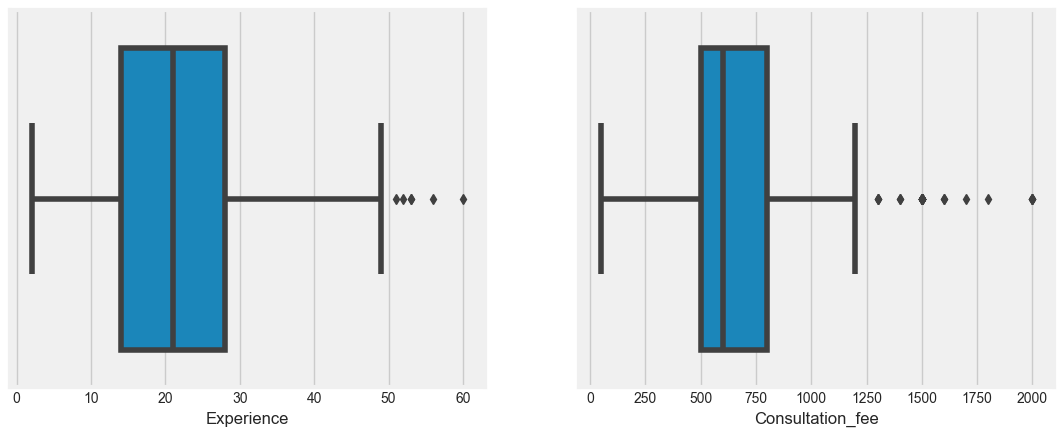

In [27]:
plt.figure(figsize=(12,5), dpi = 100)
plt.subplot(121)
sns.boxplot( x = pract_df.Experience);
plt.subplot(122)
sns.boxplot( x = pract_df.Consultation_fee);

In [28]:
## In the above boxplot we can observe both experience and consultation column as outliers..

## PIE Chart for specialisation and location

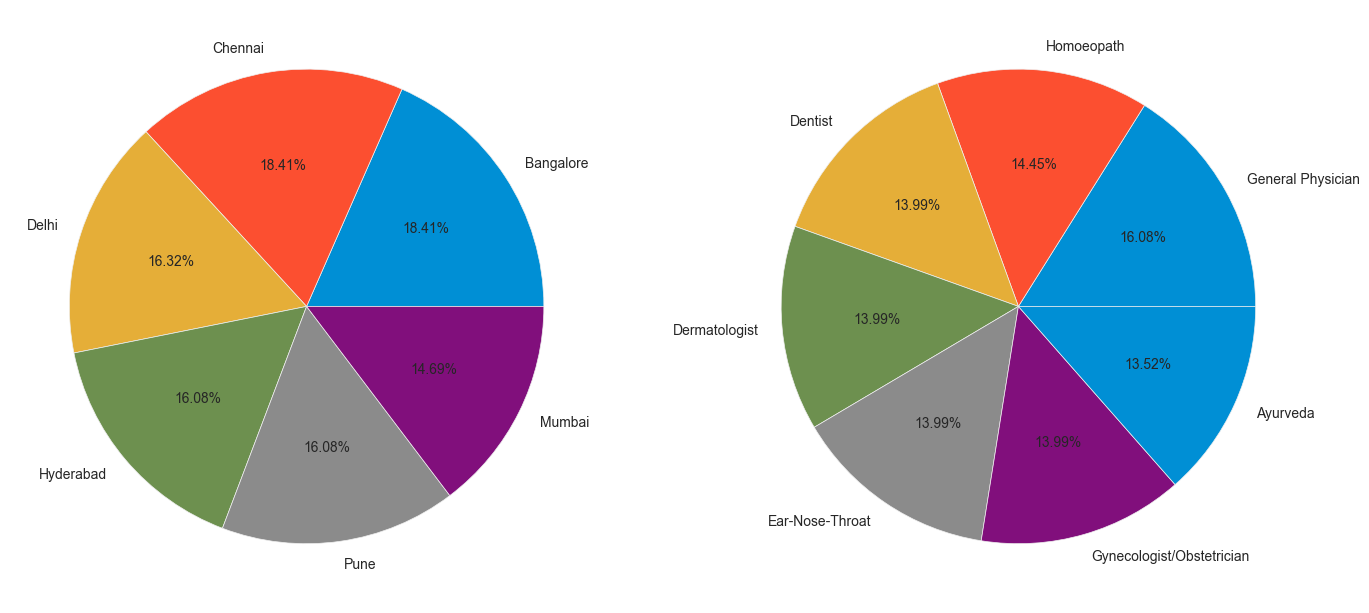

In [29]:
plt.figure(figsize = (15,10), dpi=100)
plt.subplot(121)
plt.pie(x = pract_df.City_name.value_counts(), labels = pract_df.City_name.value_counts().index, autopct = '%.2f%%')
plt.subplot(122)
plt.pie(x = pract_df.Specialization.value_counts(), labels = pract_df.Specialization.value_counts().index, autopct = '%.2f%%')

plt.show();


## Histogram/Distribution and KDE plot

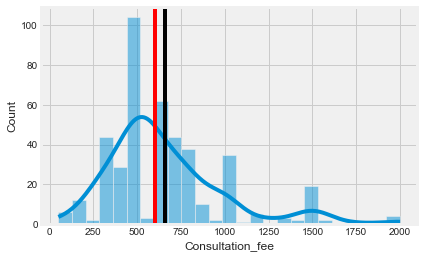

In [30]:
sns.histplot(pract_df.Consultation_fee, kde = True)
plt.axvline(pract_df.Consultation_fee.mean(), color = 'black')
plt.axvline(pract_df.Consultation_fee.median(), color = 'red');

### In the above plot mean>median and kde line is more towards right which which is due to outliers 
### positive Skewness

In [31]:
print('mean of Consulation_fee: ', pract_df.Consultation_fee.mean())
print('median of Consulation_fee: ', pract_df.Consultation_fee.median())

mean of Consulation_fee:  661.0
median of Consulation_fee:  600.0


# countplot

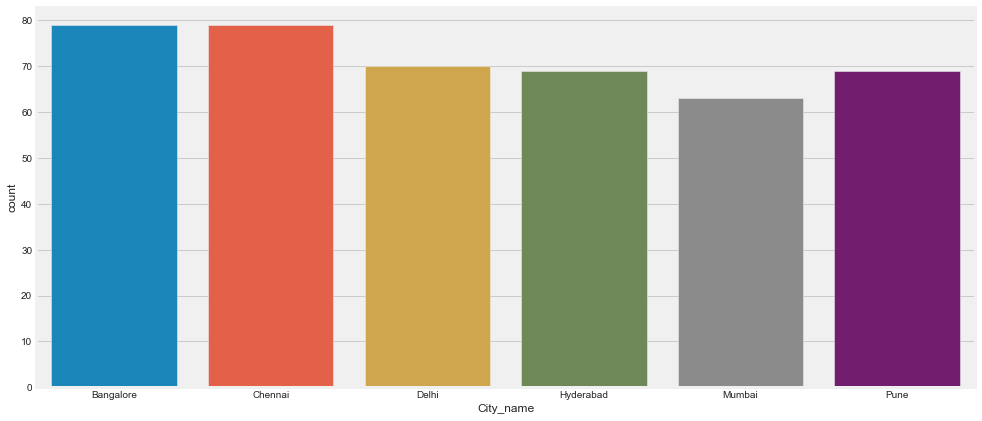

In [32]:
plt.figure(figsize = (15,7))

sns.countplot(x = pract_df.City_name);

<AxesSubplot: xlabel='City_name', ylabel='Consultation_fee'>

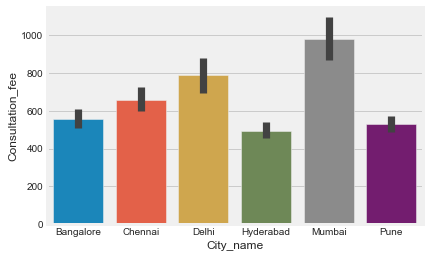

In [33]:
sns.barplot(x='City_name', y='Consultation_fee', data=pract_df)

### avg consulation_fee for mumbai is high and less in hyderabad

# BarChart(cateogorical)

## Bivariate Analysis

### Categorical & Categorical(Specialization and City_name)

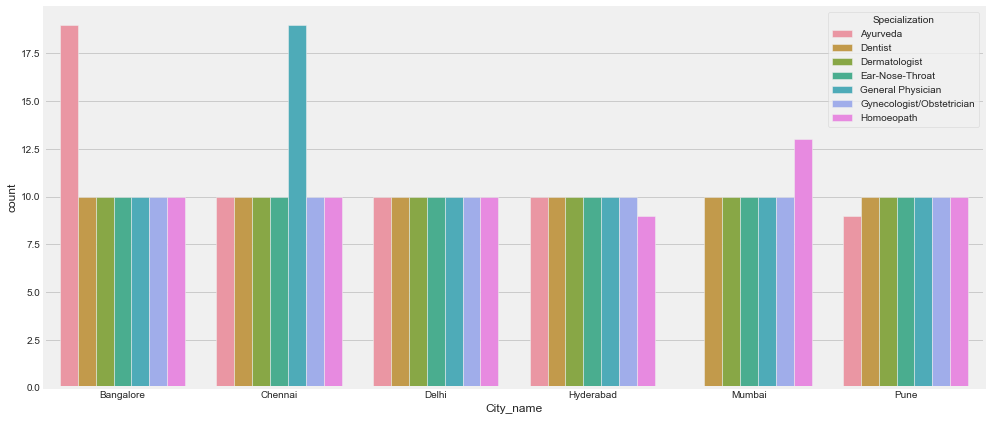

In [34]:
plt.figure(figsize = (15,7))

sns.countplot(x = pract_df.City_name, hue = pract_df['Specialization']);

In [35]:
pd.crosstab(index=pract_df.Specialization, columns=pract_df['City_name'],margins=True)

City_name,Bangalore,Chennai,Delhi,Hyderabad,Mumbai,Pune,All
Specialization,,,,,,,
Ayurveda,19,10,10,10,0,9,58
Dentist,10,10,10,10,10,10,60
Dermatologist,10,10,10,10,10,10,60
Ear-Nose-Throat,10,10,10,10,10,10,60
General Physician,10,19,10,10,10,10,69
Gynecologist/Obstetrician,10,10,10,10,10,10,60
Homoeopath,10,10,10,9,13,10,62
All,79,79,70,69,63,69,429


<AxesSubplot: xlabel='City_name'>

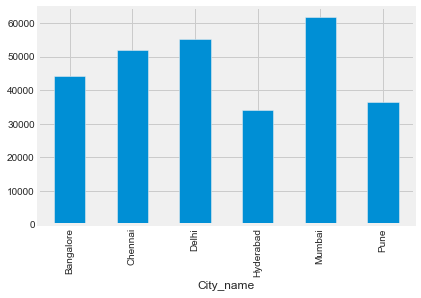

In [36]:
# Categorical & Numerical
pract_df.groupby(['City_name'])['Consultation_fee'].sum().plot(kind = 'bar')

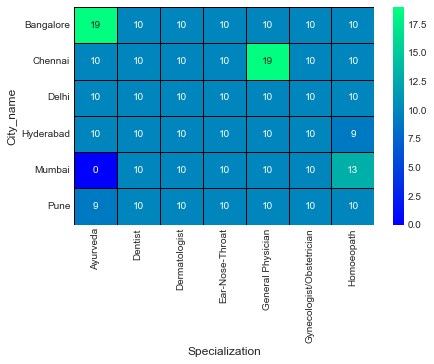

In [38]:
sns.heatmap(i, annot=True, fmt='d', linewidths=0.5, cmap='winter', linecolor='black');

In [37]:
i=pd.crosstab(index=pract_df.City_name, columns=pract_df.Specialization)

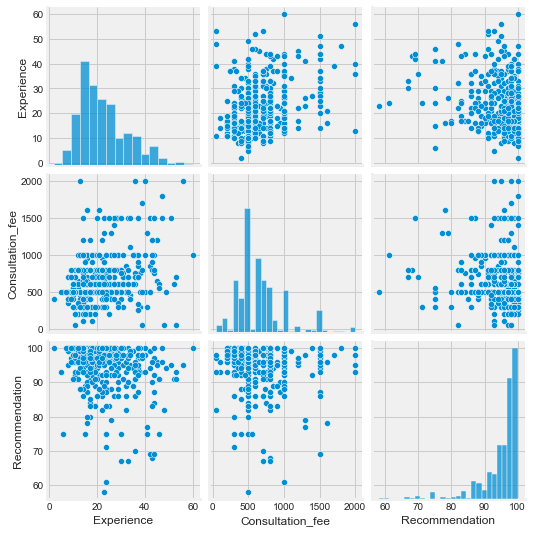

In [48]:
sns.pairplot(pract_df)

## numerical and numerical

## Correlation/Scatterplot

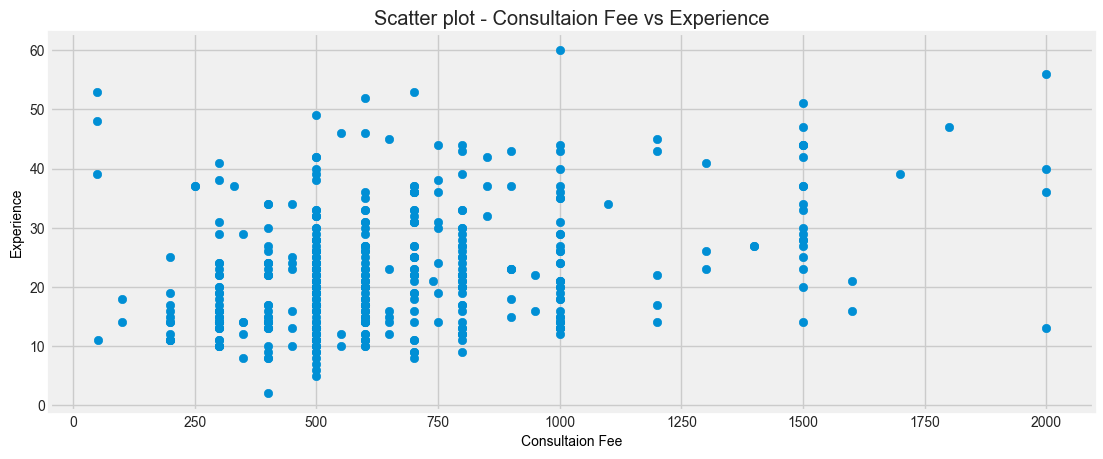

In [39]:
plt.figure(figsize=(12,5), dpi = 100)
plt.scatter(pract_df.Consultation_fee, pract_df.Experience)
plt.title('Scatter plot - Consultaion Fee vs Experience')

plt.xlabel('Consultaion Fee',fontsize = 10, color = 'black')
plt.ylabel('Experience',fontsize = 10, color = 'black')
plt.show();




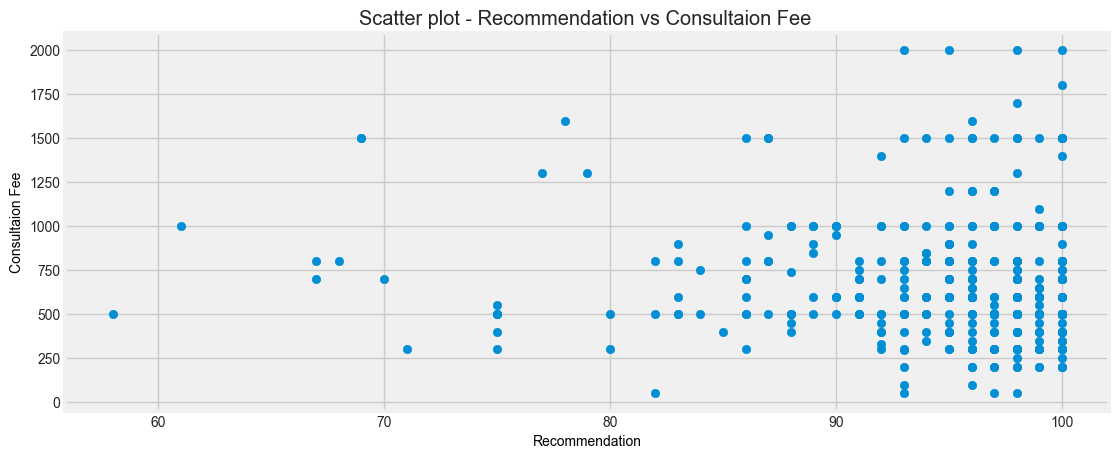

In [40]:
plt.figure(figsize=(12,5), dpi = 100)
plt.scatter(pract_df.Recommendation, pract_df.Consultation_fee)
plt.title('Scatter plot - Recommendation vs Consultaion Fee ')

plt.xlabel('Recommendation',fontsize = 10, color = 'black')
plt.ylabel('Consultaion Fee',fontsize = 10, color = 'black')
plt.show();



### scattered randomly and there is no relation..



# multivariate analysis(more than two columns/features)

In [41]:
pract_df_corr = pract_df.corr()

In [42]:
pract_df_corr

,Experience,Consultation_fee,Recommendation
Experience,1.000000,0.349648,-0.242046
Consultation_fee,0.349648,1.000000,-0.104465
Recommendation,-0.242046,-0.104465,1.000000


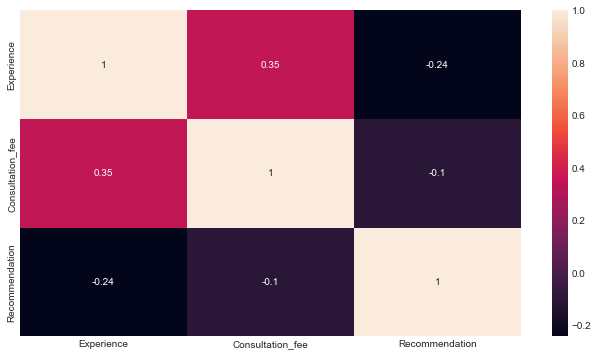

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(pract_df_corr, annot=True);

<Figure size 1500x500 with 0 Axes>

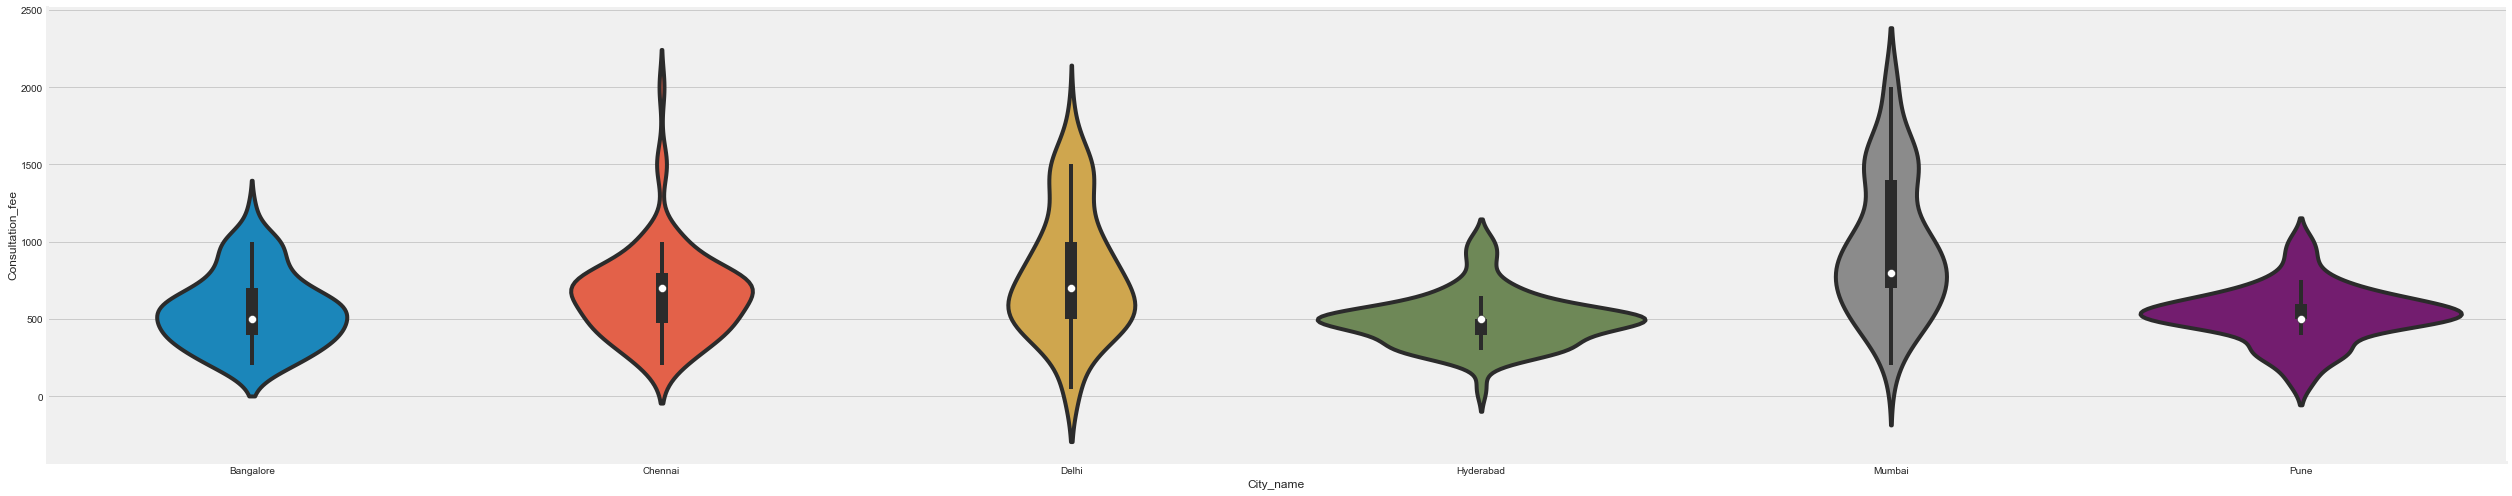

In [44]:
# check how the Consultation_fee values are varying by different features
plt.figure(figsize=(15,5), dpi = 100)
sns.catplot(data = pract_df, x = 'City_name', y = 'Consultation_fee', kind = 'violin', height=7,aspect=5);

<Figure size 1500x500 with 0 Axes>

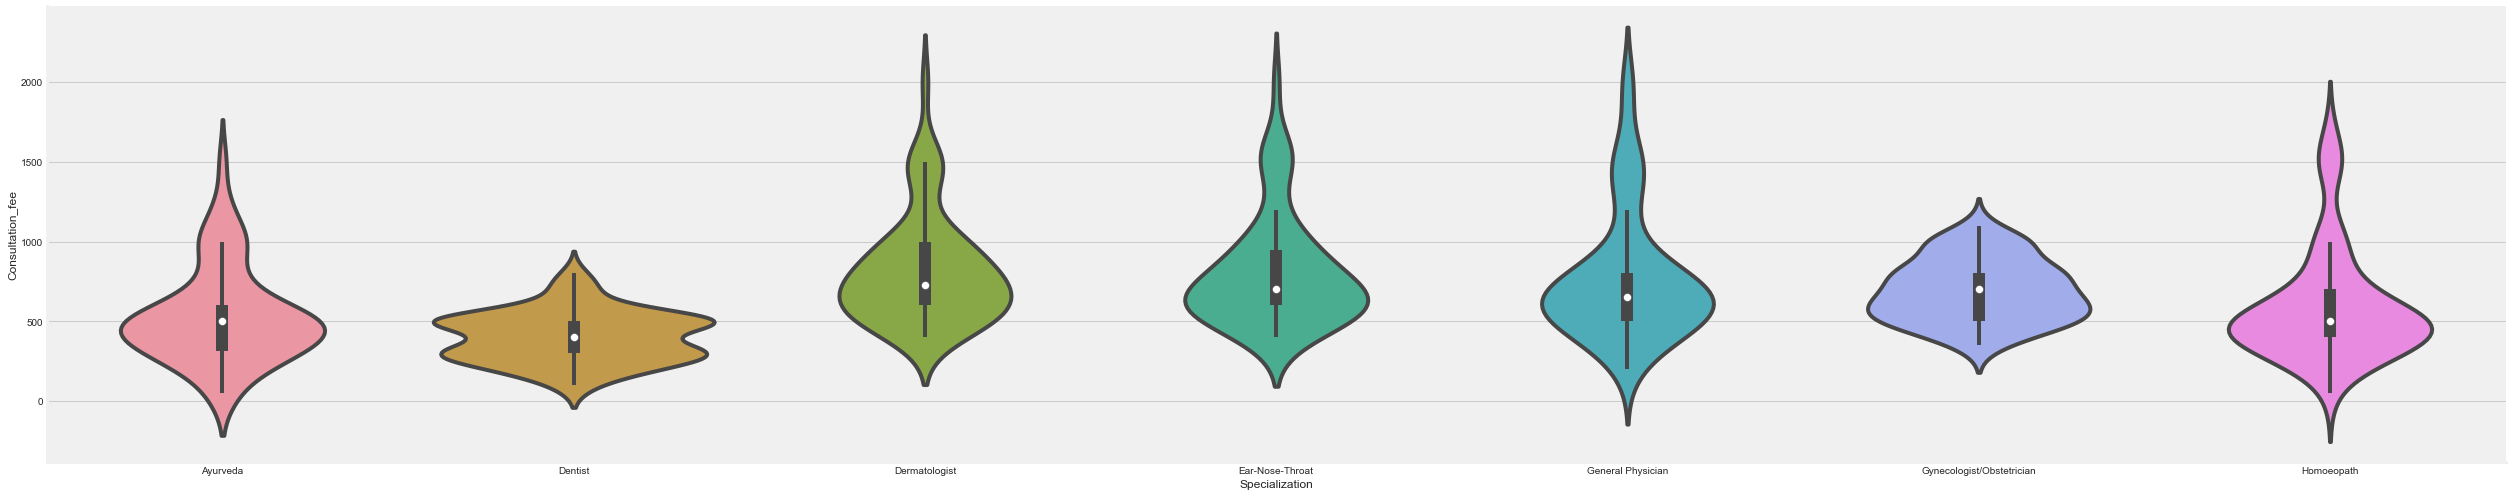

In [45]:
# check how the Consultation_fee values are varying by different features
plt.figure(figsize=(15,5), dpi = 100)
sns.catplot(data = pract_df, x = 'Specialization', y = 'Consultation_fee', kind = 'violin', height=7,aspect=5);

### from the above Voilen plots we can say that compare to specialization, consulatation_fee varying more based on City_name


In [46]:
pract_df.groupby(['City_name']).agg({'Consultation_fee': ['mean', 'median', 'max','min']})

Consultation_fee                  
                      mean median   max  min
City_name                                   
Bangalore       558.088608  500.0  1200  200
Chennai         657.594937  700.0  2000  200
Delhi           787.571429  700.0  1800   50
Hyderabad       494.927536  500.0  1000   51
Mumbai          980.158730  800.0  2000  200
Pune            528.985507  500.0  1000  100

In [47]:
pract_df.groupby(['City_name']).agg({'Consultation_fee' : ['mean', 'median', 'max', 'min']
                                                                 , 'Experience' : ['mean', 'median', 'max', 'min'], 'Recommendation':['mean', 'median', 'max', 'min']})

Consultation_fee                   Experience                 \
                      mean median   max  min       mean median max min   
City_name                                                                
Bangalore       558.088608  500.0  1200  200  22.481013   21.0  52   8   
Chennai         657.594937  700.0  2000  200  24.025316   22.0  60   2   
Delhi           787.571429  700.0  1800   50  23.257143   21.0  53   9   
Hyderabad       494.927536  500.0  1000   51  19.913043   19.0  42   8   
Mumbai          980.158730  800.0  2000  200  24.920635   23.0  53   5   
Pune            528.985507  500.0  1000  100  20.463768   18.0  44   6   

          Recommendation                  
                    mean median  max min  
City_name                                 
Bangalore      95.759494   97.0  100  68  
Chennai        95.012658   98.0  100  61  
Delhi          95.242857   96.5  100  79  
Hyderabad      94.130435   97.0  100  58  
Mumbai         93.761905   96.0  100  69  
Pune           94.550725   96.0  100  75

### from the above summary table, mean and median of mumbai city is more then chennai and delhi

# Using multiple categorical columns in GroupBy

In [49]:
pract_df.groupby(['City_name','Specialization']).agg({'Consultation_fee' : ['mean', 'median', 'max', 'min', 'std']})

Consultation_fee                         \
                                                mean  median     max    min   
City_name Specialization                                                      
Bangalore Ayurveda                        502.631579   400.0  1200.0  200.0   
          Dentist                         335.000000   300.0   600.0  200.0   
          Dermatologist                   635.000000   600.0  1000.0  450.0   
          Ear-Nose-Throat                 794.000000   770.0  1000.0  600.0   
          General Physician               550.000000   575.0   800.0  350.0   
          Gynecologist/Obstetrician       695.000000   700.0   850.0  400.0   
          Homoeopath                      444.900000   400.0  1000.0  200.0   
Chennai   Ayurveda                        525.000000   550.0   750.0  200.0   
          Dentist                         450.000000   450.0   800.0  200.0   
          Dermatologist                   710.000000   700.0  1000.0  400.0   
          Ear-Nose-Throat                 785.000000   725.0  1500.0  500.0   
          General Physician               744.736842   700.0  2000.0  300.0   
          Gynecologist/Obstetrician       740.000000   750.0  1000.0  400.0   
          Homoeopath                      570.000000   450.0  1500.0  300.0   
Delhi     Ayurveda                        665.000000   650.0  1500.0   50.0   
          Dentist                         425.000000   450.0   500.0  300.0   
          Dermatologist                  1220.000000  1450.0  1500.0  700.0   
          Ear-Nose-Throat                 730.000000   700.0  1000.0  600.0   
          General Physician              1065.000000  1000.0  1800.0  600.0   
          Gynecologist/Obstetrician       715.000000   625.0  1100.0  500.0   
          Homoeopath                      693.000000   500.0  1500.0  330.0   
Hyderabad Ayurveda                        499.900000   500.0  1000.0  299.0   
          Dentist                         410.000000   450.0   500.0  300.0   
          Dermatologist                   605.000000   550.0  1000.0  500.0   
          Ear-Nose-Throat                 580.000000   550.0   900.0  400.0   
          General Physician               520.000000   500.0   900.0  300.0   
          Gynecologist/Obstetrician       515.000000   500.0   700.0  350.0   
          Homoeopath                      316.777778   300.0   500.0   51.0   
Mumbai    Ayurveda                               NaN     NaN     NaN    NaN   
          Dentist                         505.000000   500.0   750.0  200.0   
          Dermatologist                  1080.000000  1000.0  2000.0  800.0   
          Ear-Nose-Throat                1390.000000  1500.0  2000.0  800.0   
          General Physician              1205.000000  1500.0  2000.0  500.0   
          Gynecologist/Obstetrician       880.000000   800.0  1000.0  800.0   
          Homoeopath                      857.692308   700.0  1700.0  450.0   
Pune      Ayurveda                        488.888889   500.0  1000.0  300.0   
          Dentist                         290.000000   300.0   500.0  100.0   
          Dermatologist                   645.000000   600.0   900.0  400.0   
          Ear-Nose-Throat                 560.000000   550.0   700.0  500.0   
          General Physician               565.000000   600.0   750.0  200.0   
          Gynecologist/Obstetrician       600.000000   600.0   900.0  500.0   
          Homoeopath                      550.000000   500.0  1000.0  300.0   

                                                 
                                            std  
City_name Specialization                         
Bangalore Ayurveda                   274.607641  
          Dentist                    156.436000  
          Dermatologist              176.462146  
          Ear-Nose-Throat            167.743190  
          General Physician          131.233465  
          Gynecologist/Obstetrician  140.336896  
          Homoeopath          

# treating outliers


## using log values

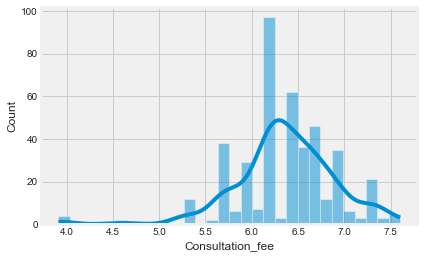

In [50]:
# using log values
sns.histplot(np.log(pract_df.Consultation_fee), kde = True);

<AxesSubplot: >

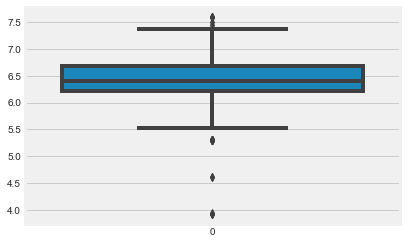

In [51]:
sns.boxplot(np.log(pract_df.Consultation_fee))

### still outliers and histplot is skewed toward down

In [52]:
# compare the variance
pract_df.Consultation_fee.var()

np.log(pract_df.Consultation_fee).var()

116368.91121495327

0.28679213039639645

# conclusion

In [53]:
pract_df.groupby(['City_name']).agg({'Consultation_fee' : ['mean', 'median', 'max','min'], 'Experience' : ['mean', 'median', 'max', 'min'], 'Recommendation':['mean', 'median', 'max', 'min']})

Consultation_fee                   Experience                 \
                      mean median   max  min       mean median max min   
City_name                                                                
Bangalore       558.088608  500.0  1200  200  22.481013   21.0  52   8   
Chennai         657.594937  700.0  2000  200  24.025316   22.0  60   2   
Delhi           787.571429  700.0  1800   50  23.257143   21.0  53   9   
Hyderabad       494.927536  500.0  1000   51  19.913043   19.0  42   8   
Mumbai          980.158730  800.0  2000  200  24.920635   23.0  53   5   
Pune            528.985507  500.0  1000  100  20.463768   18.0  44   6   

          Recommendation                  
                    mean median  max min  
City_name                                 
Bangalore      95.759494   97.0  100  68  
Chennai        95.012658   98.0  100  61  
Delhi          95.242857   96.5  100  79  
Hyderabad      94.130435   97.0  100  58  
Mumbai         93.761905   96.0  100  69  
Pune           94.550725   96.0  100  75

## obervation:

* consultation fee is high in Mumbai.
* highest paid doctors are avialable in chennai and mumbai(maximum fee is high in those cities)
* Coming to experience, even more experienced doctors are in chennai and second is mumbai
* Recommendation of doctors is high in chennai.